# Credit Case Study


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\MA20092444\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
app_data=pd.read_csv('application_data.csv')

In [3]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [4]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
app_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [7]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

## Check for missing values
- Removing the columns having null percentage greater than 50

In [8]:
# column wise null values percentage
app_data.isnull().sum()/len(app_data.index)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [9]:
app_data=app_data.loc[:, app_data.isnull().mean() <= 0.5]
app_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,

## Now we will analyse the Application Dataset

In [10]:
#lets check number of defaulters and non defaulters


(app_data['TARGET'].sum()/307511)*100



# We see 8 percent are defaulters


8.072881945686495

## We will analyse Categoical variables

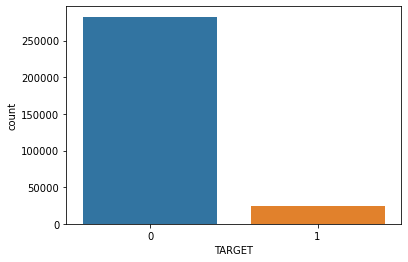

In [11]:
# we plot defaulters vs non defaulters


sns.countplot(x='TARGET',data=app_data)

## Here we will analyse these categorical variables with respect to two plots
   ###     a. Count of each category in the data
   ###     b. Percentage of Defaulters within each category 

## 1. Loan Type
- Here we see more number of people taking Cash loans than Revolving Loans
- Defaulters in Revolving Loans as compared to their frequency are unpaid
- Approx 9% Cash loan Defaulters and 5% Revolving Loans Defaulters

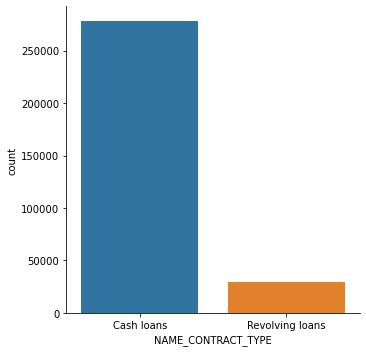

In [12]:
sns.catplot(x='NAME_CONTRACT_TYPE',kind='count',data=app_data)

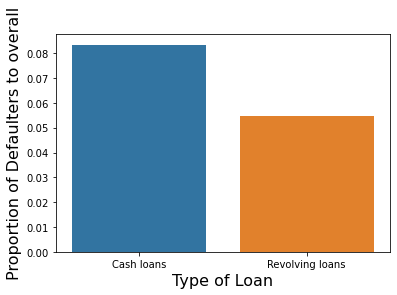

In [13]:
# Basically we have to observe how many people compared to overall

df=app_data[['NAME_CONTRACT_TYPE','TARGET']].groupby(['NAME_CONTRACT_TYPE']).mean()
df.reset_index(inplace=True)
plt.figure()
sns.set_color_codes('pastel')
sns.barplot(x='NAME_CONTRACT_TYPE',y='TARGET',data=df)
plt.xlabel('Type of Loan', fontsize = 16)
plt.ylabel('Proportion of Defaulters to overall', fontsize = 16)
plt.show()

## 2. Gender
- Three Categories Male, Female, Not Known
- The frequency of female taking loan is double than male.
- Males have a higher possibility(~ 10%) of not paying back loan than female(~7%)

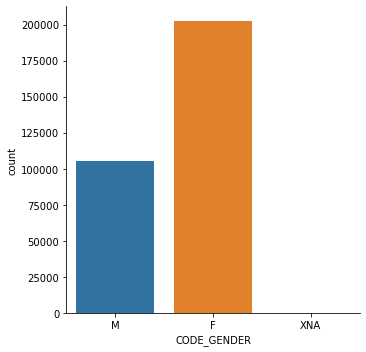

In [14]:
sns.catplot(x='CODE_GENDER',kind='count',data=app_data)

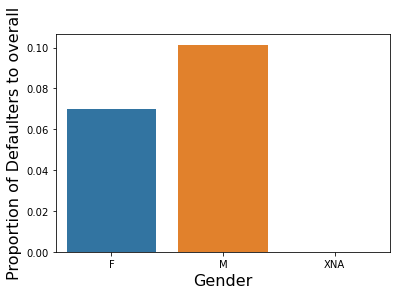

In [15]:
df=app_data[['CODE_GENDER','TARGET']].groupby(['CODE_GENDER']).mean()
df.reset_index(inplace=True)
plt.figure()
sns.set_color_codes('pastel')
sns.barplot(x='CODE_GENDER',y='TARGET',data=df)
plt.xlabel('Gender', fontsize = 16)
plt.ylabel('Proportion of Defaulters to overall', fontsize = 16)
plt.show()

## 3. Owns Car
- Frequency of people not having a car are more almost double
- People with or without car have alomst same percentage of defaulters(~ 8%)

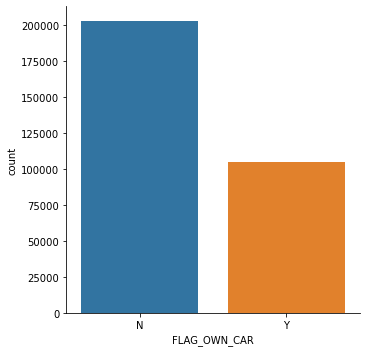

In [16]:
sns.catplot(x='FLAG_OWN_CAR',kind='count',data=app_data)

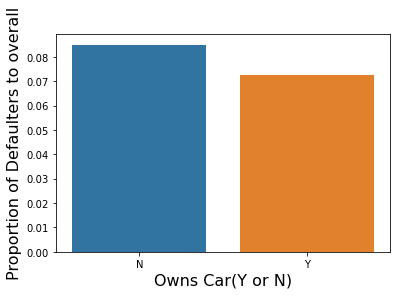

In [17]:
df=app_data[['FLAG_OWN_CAR','TARGET']].groupby(['FLAG_OWN_CAR']).mean()
df.reset_index(inplace=True)
plt.figure()
sns.set_color_codes('pastel')
sns.barplot(x='FLAG_OWN_CAR',y='TARGET',data=df)
plt.xlabel('Owns Car(Y or N)', fontsize = 16)
plt.ylabel('Proportion of Defaulters to overall', fontsize = 16)
plt.show()

 ## 4. Owns RealEstate
 - Frequency of people having real estate is double of those not having
 - Percentage of Defaulters for both categories is approx 8%

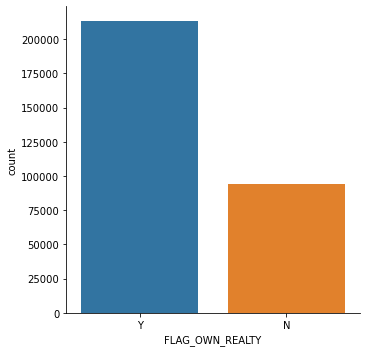

In [18]:
#Amongs Defaulters there are more number of people who own a house/estate

sns.catplot(x='FLAG_OWN_REALTY',kind='count',data=app_data)

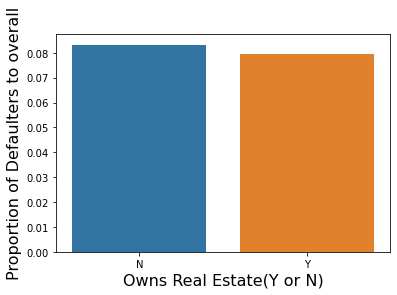

In [19]:
df=app_data[['FLAG_OWN_REALTY','TARGET']].groupby(['FLAG_OWN_REALTY']).mean()
df.reset_index(inplace=True)
plt.figure()
sns.set_color_codes('pastel')
sns.barplot(x='FLAG_OWN_REALTY',y='TARGET',data=df)
plt.xlabel('Owns Real Estate(Y or N)', fontsize = 16)
plt.ylabel('Proportion of Defaulters to overall', fontsize = 16)
plt.show()

## 5. Type of Income
- Most of the people applying loans are working followed by Commercial associate, Pensioner and State servant
- Approx 40% defaulters are observed amongst people with maternity leave
- Approx 36% defaulters are observed amongst unemployed people.

<Figure size 432x288 with 0 Axes>

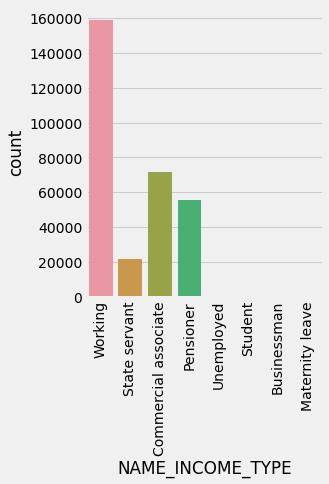

In [20]:
plt.figure()
plt.style.use('fivethirtyeight')
ax=sns.catplot(x='NAME_INCOME_TYPE',kind='count',data=app_data)
ax.set_xticklabels(rotation=90)
plt.show()

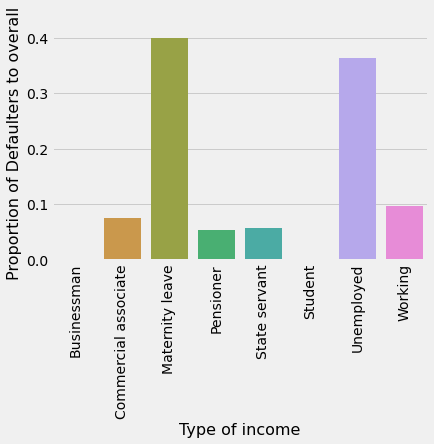

In [21]:
df=app_data[['NAME_INCOME_TYPE','TARGET']].groupby(['NAME_INCOME_TYPE']).mean()
df.reset_index(inplace=True)
plt.figure()
sns.set_color_codes('pastel')
ax=sns.barplot(x='NAME_INCOME_TYPE',y='TARGET',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel('Type of income', fontsize = 16)
plt.ylabel('Proportion of Defaulters to overall', fontsize = 16)

plt.show()

## 6. People who accompanied 
- Most people came unaccompanied at the time of loan application
- People with category other_B have great amount of defaulters as compared to their frequency

In [22]:
app_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [23]:
app_data['NAME_TYPE_SUITE'].fillna('Not filled/NA',inplace=True)

<Figure size 432x288 with 0 Axes>

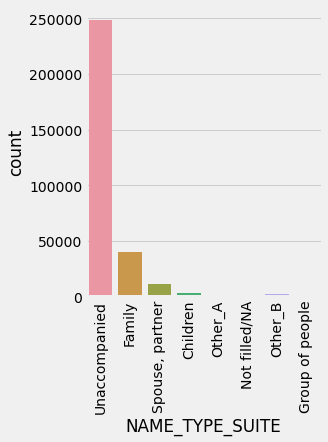

In [24]:
plt.figure()
plt.style.use('fivethirtyeight')
ax=sns.catplot(x='NAME_TYPE_SUITE',kind='count',data=app_data)
ax.set_xticklabels(rotation=90)
plt.show()

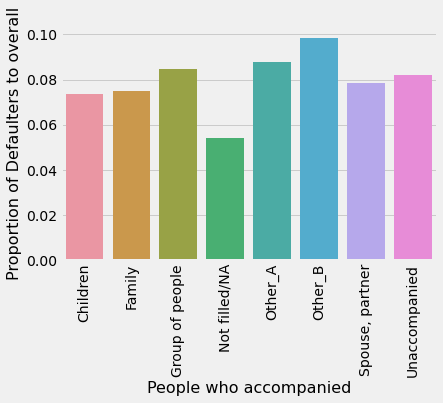

In [25]:
df=app_data[['NAME_TYPE_SUITE','TARGET']].groupby(['NAME_TYPE_SUITE']).mean()
df.reset_index(inplace=True)
plt.figure()
sns.set_color_codes('pastel')
ax=sns.barplot(x='NAME_TYPE_SUITE',y='TARGET',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel('People who accompanied', fontsize = 16)
plt.ylabel('Proportion of Defaulters to overall', fontsize = 16)

plt.show()

## 7. Type of Education
- Frequency of People having Secondary/Secondary special education are most to have applied for loan
- Lower Secondary Education people have high amount of defaulters(approx 10%) as compared to their frequency.
- Incomplete Higher(8%) and Academic Degree(4%) also have great amount of defaulters as compared to their frequency.

<Figure size 432x288 with 0 Axes>

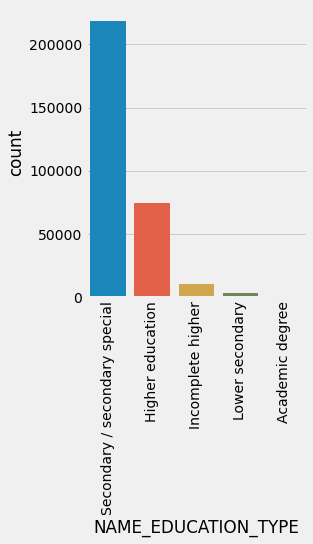

In [26]:

plt.figure()
plt.style.use('fivethirtyeight')
ax=sns.catplot(x='NAME_EDUCATION_TYPE',kind='count',data=app_data)
ax.set_xticklabels(rotation=90)
plt.show()

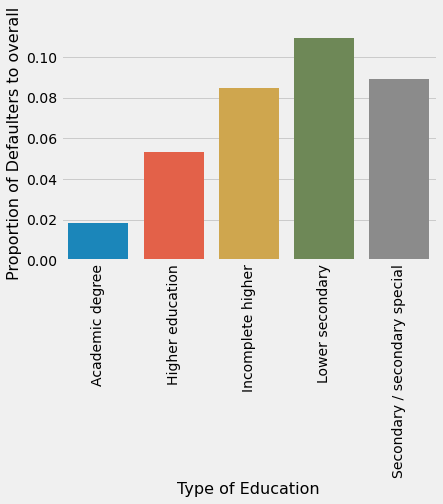

In [27]:
df=app_data[['NAME_EDUCATION_TYPE','TARGET']].groupby(['NAME_EDUCATION_TYPE']).mean()
df.reset_index(inplace=True)
plt.figure()
sns.set_color_codes('pastel')
ax=sns.barplot(x='NAME_EDUCATION_TYPE',y='TARGET',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel('Type of Education', fontsize = 16)
plt.ylabel('Proportion of Defaulters to overall', fontsize = 16)

plt.show()

## 8. Marital Status
- Most of the applicants are Married, followed Single/not maaried and civil marriage
- People with civil marriage have a high percentage(10%) of defaulters.

<Figure size 432x288 with 0 Axes>

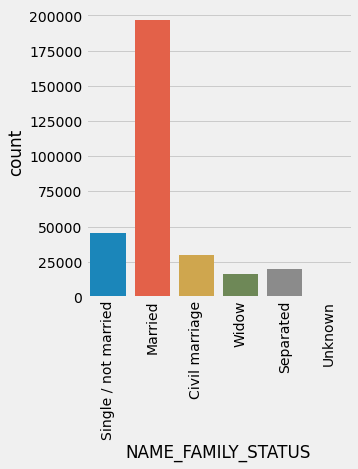

In [28]:

plt.figure()
plt.style.use('fivethirtyeight')
ax=sns.catplot(x='NAME_FAMILY_STATUS',kind='count',data=app_data)
ax.set_xticklabels(rotation=90)
plt.show()

Text(0, 0.5, 'Proportion of Defaulters to overall')

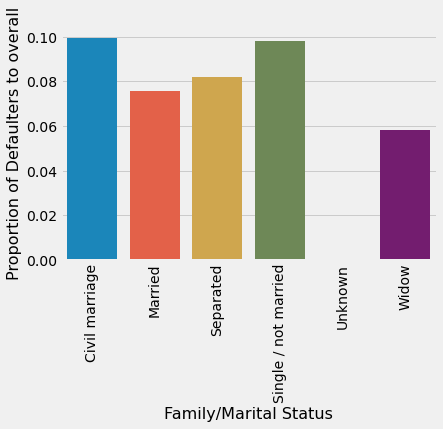

In [29]:
df=app_data[['NAME_FAMILY_STATUS','TARGET']].groupby(['NAME_FAMILY_STATUS']).mean()
df.reset_index(inplace=True)
plt.figure()
sns.set_color_codes('pastel')
ax=sns.barplot(x='NAME_FAMILY_STATUS',y='TARGET',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel('Family/Marital Status', fontsize = 16)
plt.ylabel('Proportion of Defaulters to overall', fontsize = 16)


## 9. Type of Housing
- Most of the Applicants are people with House/Apartment followed with people with parents
- People with Rented Apartment(12%) and with parents(12%) have high amount of defaulters.

<Figure size 432x288 with 0 Axes>

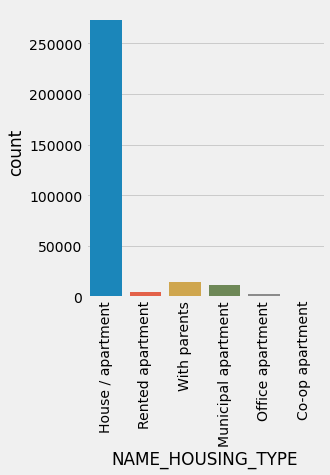

In [30]:
plt.figure()
plt.style.use('fivethirtyeight')
ax=sns.catplot(x='NAME_HOUSING_TYPE',kind='count',data=app_data)
ax.set_xticklabels(rotation=90)
plt.show()

Text(0, 0.5, 'Proportion of Defaulters to overall')

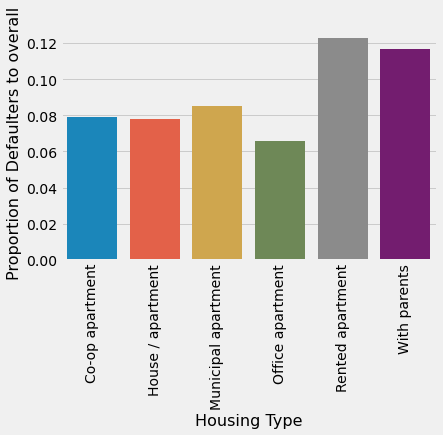

In [31]:
df=app_data[['NAME_HOUSING_TYPE','TARGET']].groupby(['NAME_HOUSING_TYPE']).mean()
df.reset_index(inplace=True)
plt.figure()
sns.set_color_codes('pastel')
ax=sns.barplot(x='NAME_HOUSING_TYPE',y='TARGET',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel('Housing Type', fontsize = 16)
plt.ylabel('Proportion of Defaulters to overall', fontsize = 16)

## 10. Occupation Type
- Ignoring the NA category, Most of the applicants are laborers, followed by Cleaning Staff and Core staff
- Low Skill laborers have highest percentage(17%)  of defaulters, followed by Waiters/barmen staff(12%) ,Drivers (11%) , Security Staff(11%), Cooking Staff(10%).

In [32]:
app_data['OCCUPATION_TYPE'].isnull().sum()

96391

In [33]:
app_data['OCCUPATION_TYPE'].fillna('NA/Unemployed',inplace=True)

<Figure size 432x288 with 0 Axes>

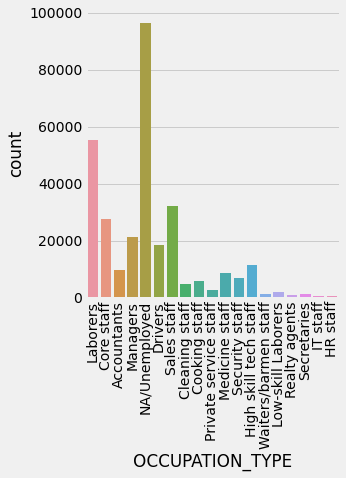

In [34]:
plt.figure()
plt.style.use('fivethirtyeight')
ax=sns.catplot(x='OCCUPATION_TYPE',kind='count',data=app_data)
ax.set_xticklabels(rotation=90)
plt.show()

Text(0, 0.5, 'Proportion of Defaulters to overall')

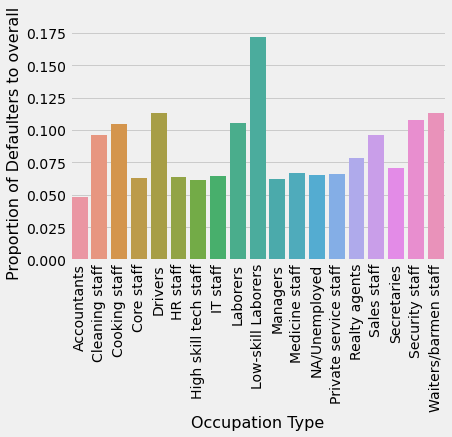

In [35]:
df=app_data[['OCCUPATION_TYPE','TARGET']].groupby(['OCCUPATION_TYPE']).mean()
df.reset_index(inplace=True)
plt.figure()
sns.set_color_codes('pastel')
ax=sns.barplot(x='OCCUPATION_TYPE',y='TARGET',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel('Occupation Type', fontsize = 16)
plt.ylabel('Proportion of Defaulters to overall', fontsize = 16)

## 11. Type of Organization where client works
- Organization with highest percentage of defaulters are Transport Type 3(16%), Industry Type 13(13%) and Industry Type 8(12.5%)

<Figure size 1152x360 with 0 Axes>

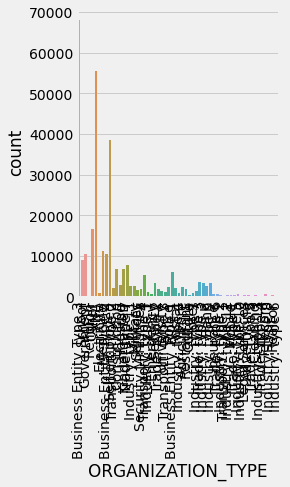

In [36]:
plt.figure(figsize=(16,5))
plt.style.use('fivethirtyeight')
ax=sns.catplot(x='ORGANIZATION_TYPE',kind='count',data=app_data)
ax.set_xticklabels(rotation=90)
plt.show()

Text(0, 0.5, 'Proportion of Defaulters to overall')

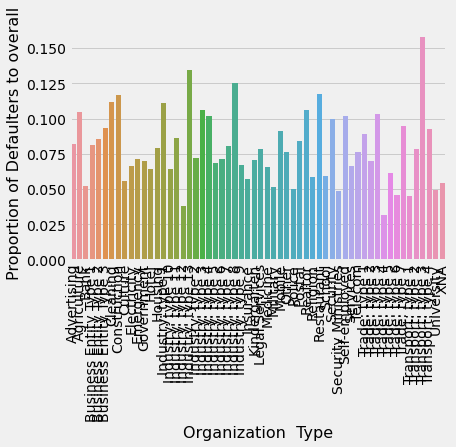

In [37]:
df=app_data[['ORGANIZATION_TYPE','TARGET']].groupby(['ORGANIZATION_TYPE']).mean()
df.reset_index(inplace=True)
plt.figure()
sns.set_color_codes('pastel')
ax=sns.barplot(x='ORGANIZATION_TYPE',y='TARGET',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel('Organization  Type', fontsize = 16)
plt.ylabel('Proportion of Defaulters to overall', fontsize = 16)

## We have variables with no. of Days, Lets analyse them
- Converting them to years before
- Grouping them in years and analysing defaulters 

## 1. Age of Applicants
- Most of the Applicants are of the age group 30-40, followed by 40-50 and 50-60
- Applicants with 20-30(11%) have high amount of defaulters, followed by 30-40(9%) and 40-50(7%)

In [38]:
## dob
dob=app_data['DAYS_BIRTH']
app_data['DOB']=(dob*-1)//365
app_data['grouped_age']=pd.cut(app_data['DOB'],bins=[0,20,30,40,50,60,99999],labels=['less than 20','20-30','30-40','40-50','50-60','greater than 60'])

<Figure size 432x288 with 0 Axes>

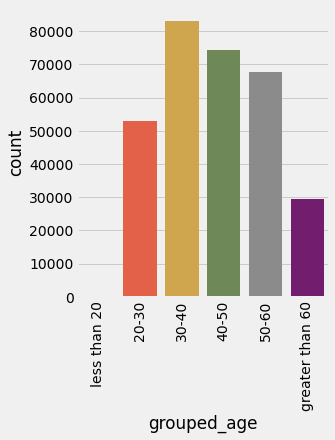

In [39]:
plt.figure()
plt.style.use('fivethirtyeight')
ax=sns.catplot(x='grouped_age',kind='count',data=app_data)
ax.set_xticklabels(rotation=90)
plt.show()

Text(0, 0.5, 'Proportion of Defaulters to overall')

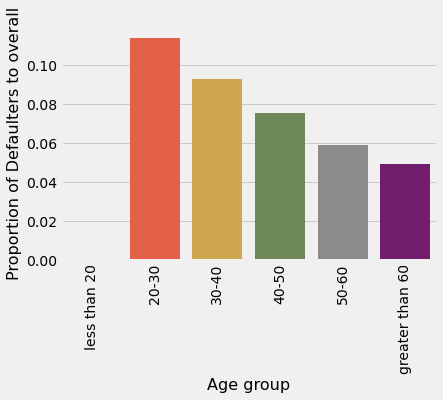

In [40]:
df=app_data[['grouped_age','TARGET']].groupby(['grouped_age']).mean()
df.reset_index(inplace=True)
plt.figure()
sns.set_color_codes('pastel')
ax=sns.barplot(x='grouped_age',y='TARGET',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel('Age group', fontsize = 16)
plt.ylabel('Proportion of Defaulters to overall', fontsize = 16)

## 2. Years before Employed
- We are analysing only years before the applicant got employed
- Most of the applicant have worked 0-5 years before filling application, followed by 5-10 years and  10-20 years
- The trend for defaulters is also same 0-5(10%) years followed by 5-10(7%) years and 10-20(6%) years

In [41]:
dob=app_data['DAYS_EMPLOYED']
app_data['Employed(years)']=(dob*-1)//365
#app_data['Employed(years)'].unique()
app_data['grouped_employed']=pd.cut(app_data['Employed(years)'],bins=[-1,5,10,20,30,40,50,9999],labels=['0-5','5-10','10-20','20-30','30-40','40-50','Greater than 50'])

In [42]:
app_data['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [43]:
app_data['grouped_employed'].isnull().sum()

55374

<Figure size 432x288 with 0 Axes>

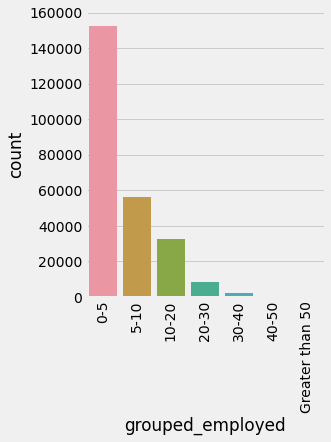

In [44]:
plt.figure()
plt.style.use('fivethirtyeight')
ax=sns.catplot(x='grouped_employed',kind='count',data=app_data)
ax.set_xticklabels(rotation=90)
plt.show()

Text(0, 0.5, 'Proportion of Defaulters to overall')

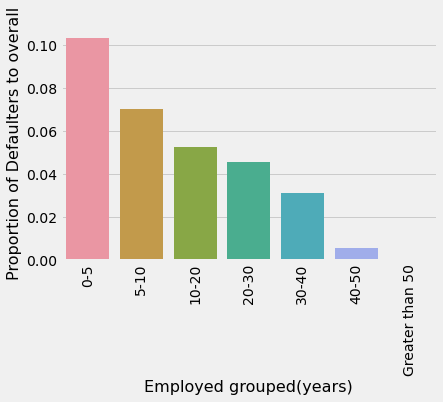

In [45]:
df=app_data[['grouped_employed','TARGET']].groupby(['grouped_employed']).mean()
df.reset_index(inplace=True)
plt.figure()
sns.set_color_codes('pastel')
ax=sns.barplot(x='grouped_employed',y='TARGET',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel('Employed grouped(years)', fontsize = 16)
plt.ylabel('Proportion of Defaulters to overall', fontsize = 16)

## 3. Years before Registration Change
- Most of the Applicants have their Registration Done 10-20 years back followed by 5-10 years back
- Most of the Defaulters(8%) are people having Registration 5-10 years back and they decrease as the years increase.

In [46]:
d=app_data['DAYS_REGISTRATION']
app_data['Registration_Change']=(d*-1)//365
app_data['Registration_Change']

app_data['grouped_reg_change(years)']=pd.cut(app_data['Registration_Change'],bins=[-1,5,10,20,30,40,50,9999],labels=['0-5','5-10','10-20','20-30','30-40','40-50','Greater than 50'])

In [47]:
app_data['Registration_Change'].describe()

count    307511.000000
mean         13.168683
std           9.646841
min           0.000000
25%           5.000000
50%          12.000000
75%          20.000000
max          67.000000
Name: Registration_Change, dtype: float64

<Figure size 432x288 with 0 Axes>

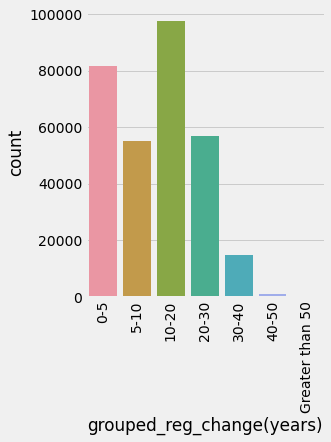

In [48]:
plt.figure()
plt.style.use('fivethirtyeight')
ax=sns.catplot(x='grouped_reg_change(years)',kind='count',data=app_data)
ax.set_xticklabels(rotation=90)
plt.show()

Text(0, 0.5, 'Proportion of Defaulters to overall')

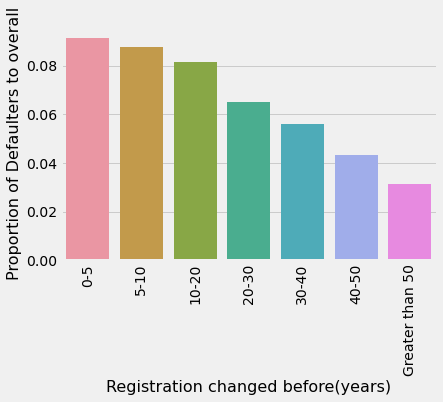

In [49]:
df=app_data[['grouped_reg_change(years)','TARGET']].groupby(['grouped_reg_change(years)']).mean()
df.reset_index(inplace=True)
plt.figure()
sns.set_color_codes('pastel')
ax=sns.barplot(x='grouped_reg_change(years)',y='TARGET',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel('Registration changed before(years)', fontsize = 16)
plt.ylabel('Proportion of Defaulters to overall', fontsize = 16)

## 4. Years Before Identity Change
- Mostly Applicants have their identity changed 10-20 years back.
- Most of the Defauters have their Identity change 5-10(10%) years back.

In [50]:
d=app_data['DAYS_ID_PUBLISH']
app_data['Identity_change']=(d*-1)//365
app_data['Identity_change']

app_data['grouped_identity_change(years)']=pd.cut(app_data['Identity_change'],bins=[-1,5,10,20],labels=['0-5','5-10','10-20'])

In [51]:
app_data['Identity_change'].describe()

count    307511.000000
mean          7.713474
std           4.134515
min           0.000000
25%           4.000000
50%           8.000000
75%          11.000000
max          19.000000
Name: Identity_change, dtype: float64

<Figure size 432x288 with 0 Axes>

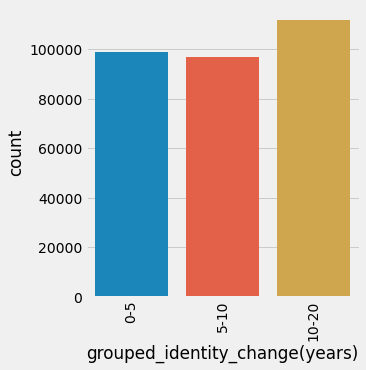

In [52]:
plt.figure()
plt.style.use('fivethirtyeight')
ax=sns.catplot(x='grouped_identity_change(years)',kind='count',data=app_data)
ax.set_xticklabels(rotation=90)
plt.show()

Text(0, 0.5, 'Proportion of Defaulters to overall')

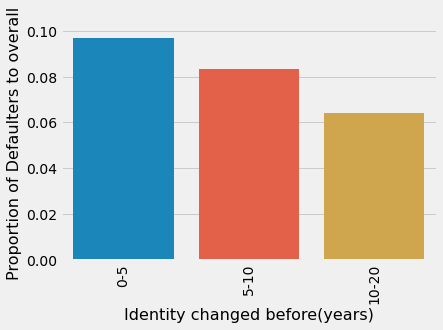

In [53]:
df=app_data[['grouped_identity_change(years)','TARGET']].groupby(['grouped_identity_change(years)']).mean()
df.reset_index(inplace=True)
plt.figure()
sns.set_color_codes('pastel')
ax=sns.barplot(x='grouped_identity_change(years)',y='TARGET',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel('Identity changed before(years)', fontsize = 16)
plt.ylabel('Proportion of Defaulters to overall', fontsize = 16)

## We begin our analysis on Continous Variables
- We perform Boxplot analysis to detect Outliers
- Generate Quantiles and group them on the basis of quantiles
- Plot their distribution

## 1. Income of Applicants
- Boxplot of Income of Applicants didnt provide any Insights
- The data is highly skewed
- Amongst the Defaulters people with income in first 25% quantile are more followed  50% to 75% Quantile
- There is one Major Outlier, rest of them cannot be treated as Outlier
- We plot the Log Distribution of the Income which looks like Normal Distribution

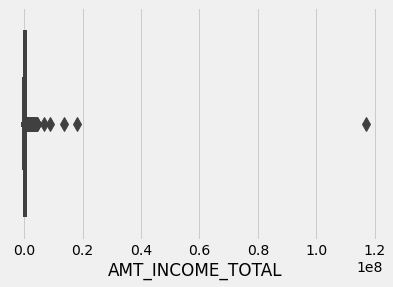

In [136]:
sns.boxplot('AMT_INCOME_TOTAL',fliersize=10,data=app_data)

In [137]:
app_data['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [138]:
# We see the income has some outliers or people with high income
# one point extremly far which is major outlier 
# We can treat the data above 0.75 to 0.99 as high income category


app_data['AMT_INCOME_TOTAL'].quantile([0.25,0.50,0.75,0.99,1])

0.25       112500.0
0.50       147150.0
0.75       202500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [139]:
# Now Lets see income range of defaulters

app_data[app_data['TARGET']==1]['AMT_INCOME_TOTAL'].quantile([0.25,0.50,0.75,0.99,1])

0.25       112500.0
0.50       135000.0
0.75       202500.0
0.99       450000.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [140]:
# Now Lets see income range of non-defaulters

app_data[app_data['TARGET']==0]['AMT_INCOME_TOTAL'].quantile([0.25,0.50,0.75,0.99,1])

0.25      112500.0
0.50      148500.0
0.75      202500.0
0.99      486000.0
1.00    18000090.0
Name: AMT_INCOME_TOTAL, dtype: float64

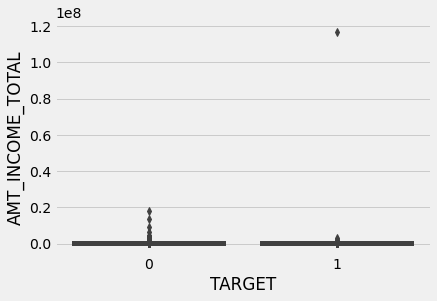

In [141]:
sns.boxplot(x='TARGET',y='AMT_INCOME_TOTAL',data=app_data)

In [142]:
# we group the income ranges on the basis of quantiles


app_data['grouped_income']=pd.qcut(app_data['AMT_INCOME_TOTAL'],q=[0,0.25,0.5,0.75,0.99,1],labels=['0-0.25','0.25-0.50','0.50-0.75','0.75-0.99','0.99-1'])

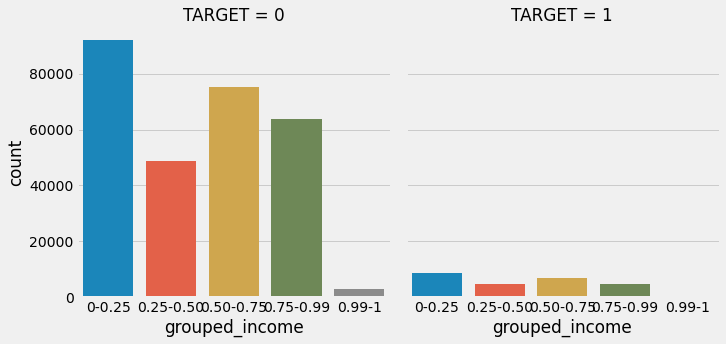

In [143]:
# we see how many defaulters are there for various income ranges

sns.catplot(x='grouped_income',col='TARGET',kind='count',data=app_data)

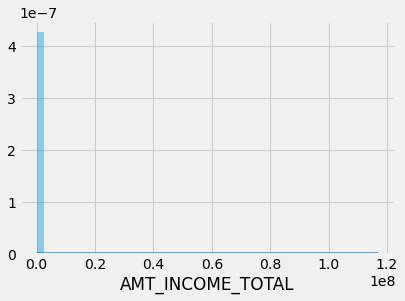

In [144]:
sns.distplot(app_data['AMT_INCOME_TOTAL'])

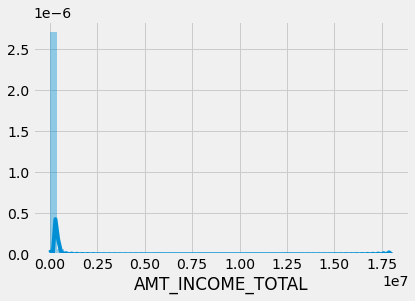

In [145]:
sns.distplot((app_data[app_data['AMT_INCOME_TOTAL']!=117000000]['AMT_INCOME_TOTAL']))

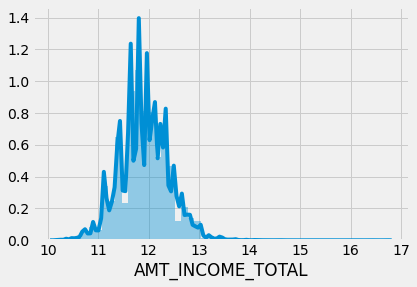

In [146]:
sns.distplot(np.log(app_data[app_data['AMT_INCOME_TOTAL']!=117000000]['AMT_INCOME_TOTAL']))

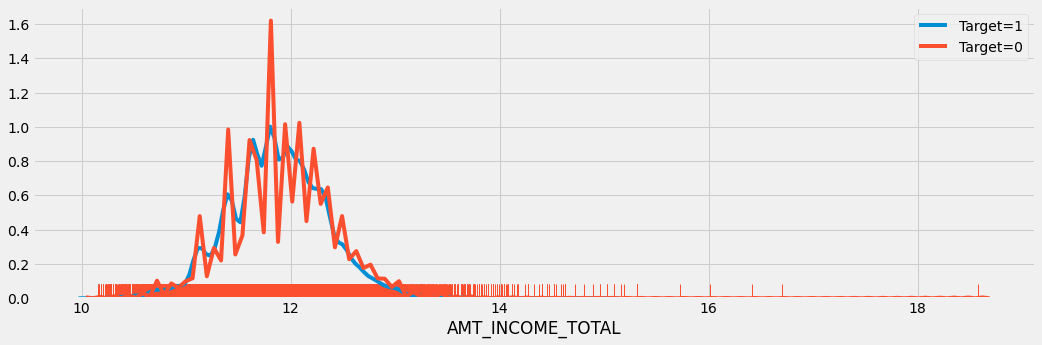

In [147]:
plt.figure(figsize=(16,5))
sns.distplot(np.log(app_data[(app_data['AMT_INCOME_TOTAL']!=117000000) & (app_data['TARGET']==1)]['AMT_INCOME_TOTAL']),hist=False,rug=True,label='Target=1')
sns.distplot(np.log(app_data[(app_data['AMT_INCOME_TOTAL']!=117000000) & app_data['TARGET']==0]['AMT_INCOME_TOTAL']),hist=False,rug=True,label='Target=0')
plt.show()

## 2. Loan Amount
- Boxplot Shows Median Loan Amount as 5 Lakh
- Median Loan Amount for both Defaulters and Non Defaulters is approximately same
- Distribution Shows the data left skewed, number of people decrease as loan amount increase after median.
- Some Spikes in Loan Amount which tells people takes a particular Loan Amount more like whole number.

In [148]:
app_data['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

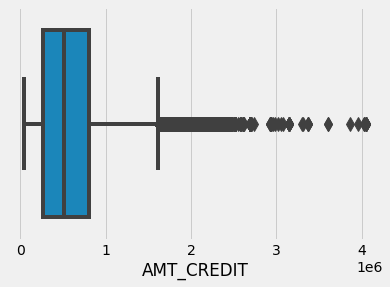

In [149]:
sns.boxplot('AMT_CREDIT',fliersize=10,data=app_data)

In [150]:
app_data['AMT_CREDIT'].quantile([0.25,0.50,0.75,0.99,1])

0.25     270000.0
0.50     513531.0
0.75     808650.0
0.99    1854000.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64

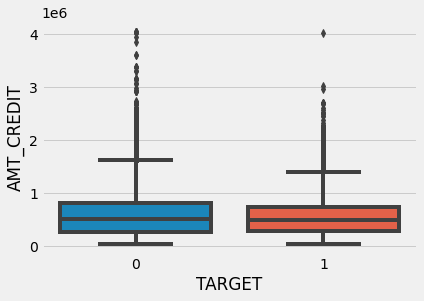

In [151]:
sns.boxplot(x='TARGET',y='AMT_CREDIT',data=app_data)

In [152]:
app_data['grouped_loan_amount']=pd.qcut(app_data['AMT_CREDIT'],q=[0,0.25,0.5,0.75,0.99,1],labels=['0-0.25','0.25-0.50','0.50-0.75','0.75-0.99','0.99-1'])

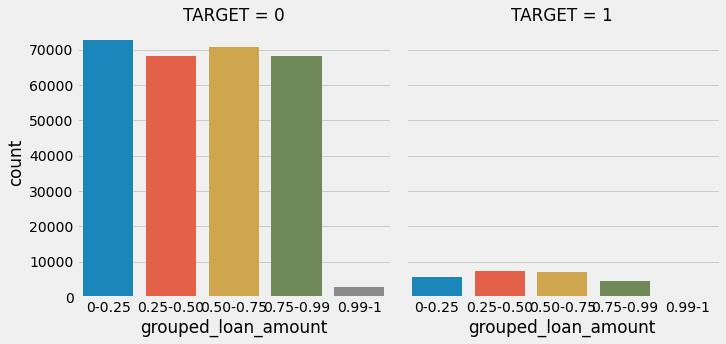

In [153]:
sns.catplot(x='grouped_loan_amount',col='TARGET',kind='count',data=app_data)

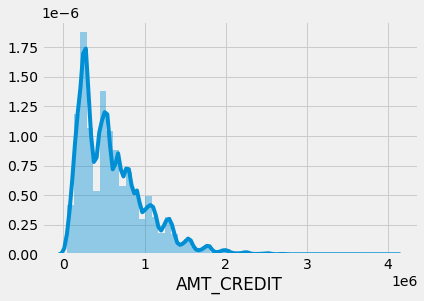

In [154]:
sns.distplot(app_data['AMT_CREDIT'])

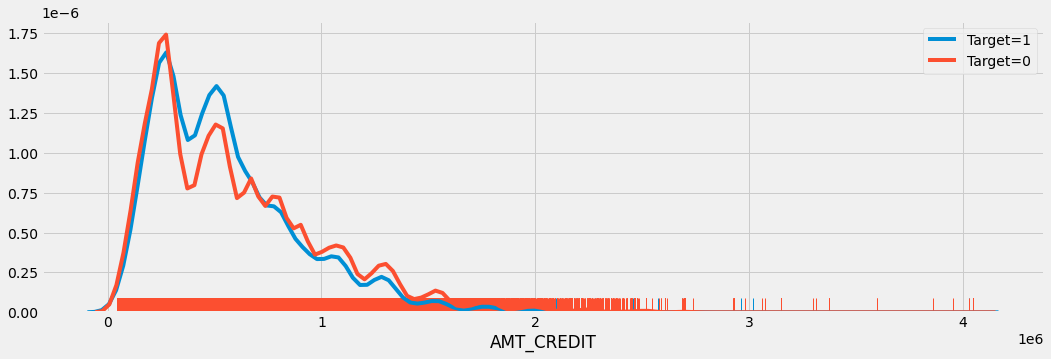

In [155]:
plt.figure(figsize=(16,5))
sns.distplot(app_data[app_data['TARGET']==1]['AMT_CREDIT'],hist=False,rug=True,label='Target=1')
sns.distplot(app_data[app_data['TARGET']==0]['AMT_CREDIT'],hist=False,rug=True,label='Target=0')
plt.show()

## 3. Amount Annuity
- Box plot shows outliers but they are continous in nature so we wont consider them as outliers
- Again the Median Amount Annunity is almost Same for Defaulters and Non Defaulters
- The Distribution is Left skewed for both Defaulters and Non Defaulters

In [156]:
app_data['AMT_ANNUITY'].describe()

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

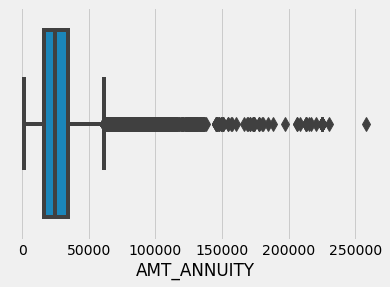

In [157]:
sns.boxplot('AMT_ANNUITY',fliersize=10,data=app_data)

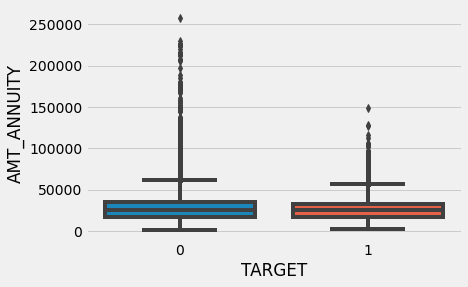

In [158]:
sns.boxplot(x='TARGET',y='AMT_ANNUITY',data=app_data)

In [159]:
app_data['AMT_ANNUITY'].quantile([0.25,0.50,0.75,0.99,0.95,1])

0.25     16524.0
0.50     24903.0
0.75     34596.0
0.99     70006.5
0.95     53325.0
1.00    258025.5
Name: AMT_ANNUITY, dtype: float64

In [214]:
app_data['grouped_annuity']=pd.qcut(app_data['AMT_ANNUITY'],q=[0,0.25,0.5,0.75,0.99,1],labels=['0-0.25','0.25-0.50','0.50-0.75','0.75-0.99','0.99-1'])

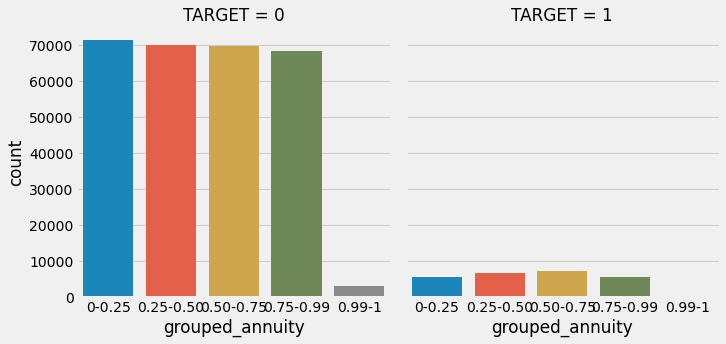

In [215]:
sns.catplot(x='grouped_annuity',col='TARGET',kind='count',data=app_data)

In [162]:
app_data['AMT_ANNUITY'].isnull().sum()


0

In [163]:
app_data['AMT_ANNUITY'].fillna(app_data['AMT_ANNUITY'].median(),inplace=True)

In [164]:
app_data['AMT_ANNUITY'].isnull().sum()

0

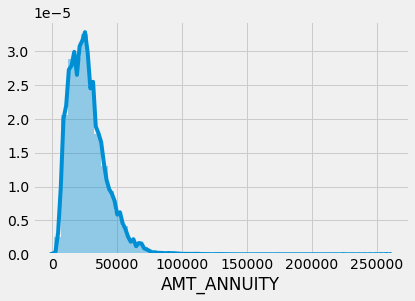

In [165]:
sns.distplot(app_data['AMT_ANNUITY'])

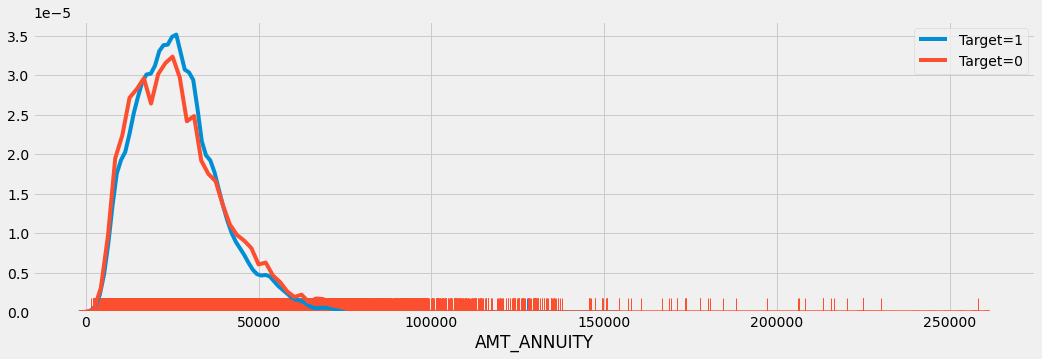

In [166]:
plt.figure(figsize=(16,5))
sns.distplot(app_data[app_data['TARGET']==1]['AMT_ANNUITY'],hist=False,rug=True,label='Target=1')
sns.distplot(app_data[app_data['TARGET']==0]['AMT_ANNUITY'],hist=False,rug=True,label='Target=0')
plt.show()

## 4. Amount Goods Price
- Box plot shows outliers but they are continous in nature so we wont consider them as outliers
- The Distribution is Spiked telling people taking particular amount loan are more, like whole number amount

In [167]:
app_data['AMT_GOODS_PRICE'].describe()

count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

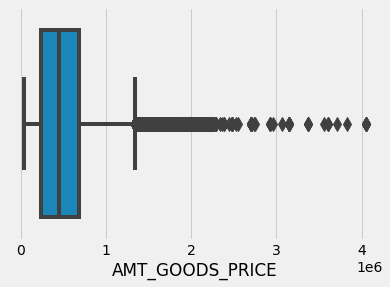

In [168]:
sns.boxplot('AMT_GOODS_PRICE',fliersize=10,data=app_data)

In [169]:
app_data['AMT_GOODS_PRICE'].quantile([0.25,0.50,0.75,0.99,0.95,1])

0.25     238500.0
0.50     450000.0
0.75     679500.0
0.99    1800000.0
0.95    1305000.0
1.00    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [170]:
app_data['AMT_GOODS_PRICE'].isnull().sum()

0

In [171]:
app_data['AMT_GOODS_PRICE'].fillna(app_data['AMT_GOODS_PRICE'].median(),inplace=True)

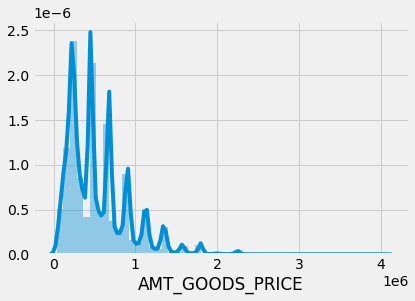

In [172]:
sns.distplot(app_data['AMT_GOODS_PRICE'])

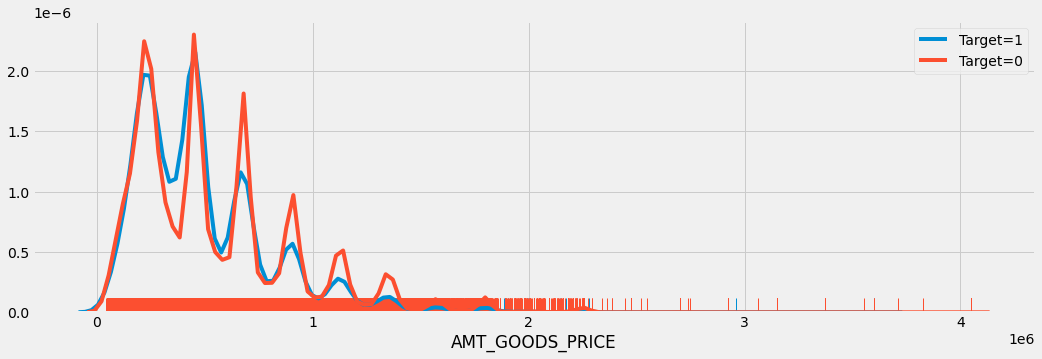

In [173]:
plt.figure(figsize=(16,5))
sns.distplot(app_data[app_data['TARGET']==1]['AMT_GOODS_PRICE'],hist=False,rug=True,label='Target=1')
sns.distplot(app_data[app_data['TARGET']==0]['AMT_GOODS_PRICE'],hist=False,rug=True,label='Target=0')
plt.show()

## Since we are not doing prediction we wont treat the outliers but we have identified them

## Multivariate Analysis
- In Scatter plot ,We see Loan Amount and amount goods price are highly correlated(99%), because both actually represent same if its consumer loan
- Loan Amount and Amount annuity also show corelation(77%)

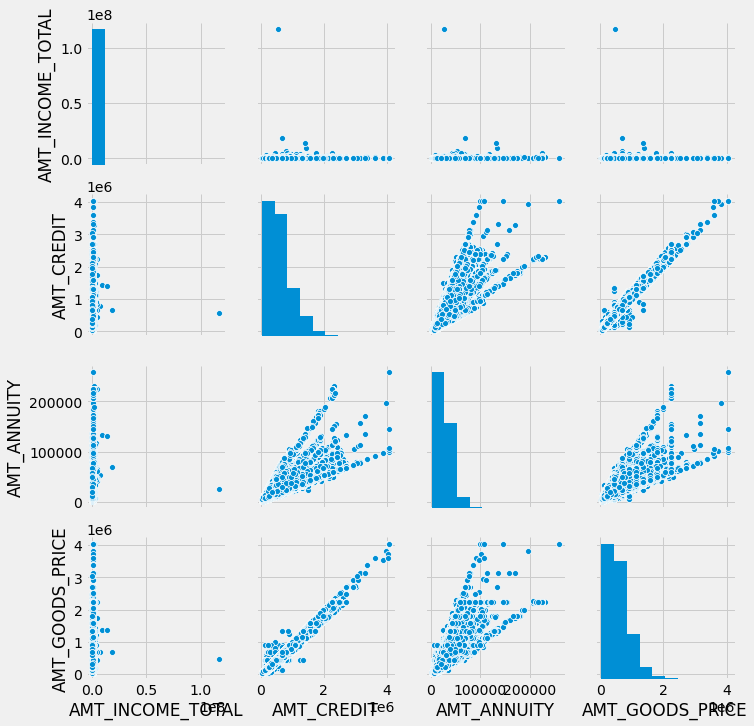

In [175]:
# We see Loan Amount and amount goods price are highly correlated, because both actually represent same if its consumer loan
sns.pairplot(data=app_data,vars=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE'])

In [176]:
app_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
AMT_INCOME_TOTAL,1.000000,0.156870,0.191657,0.159632
AMT_CREDIT,0.156870,1.000000,0.770127,0.986734
AMT_ANNUITY,0.191657,0.770127,1.000000,0.774837
AMT_GOODS_PRICE,0.159632,0.986734,0.774837,1.000000


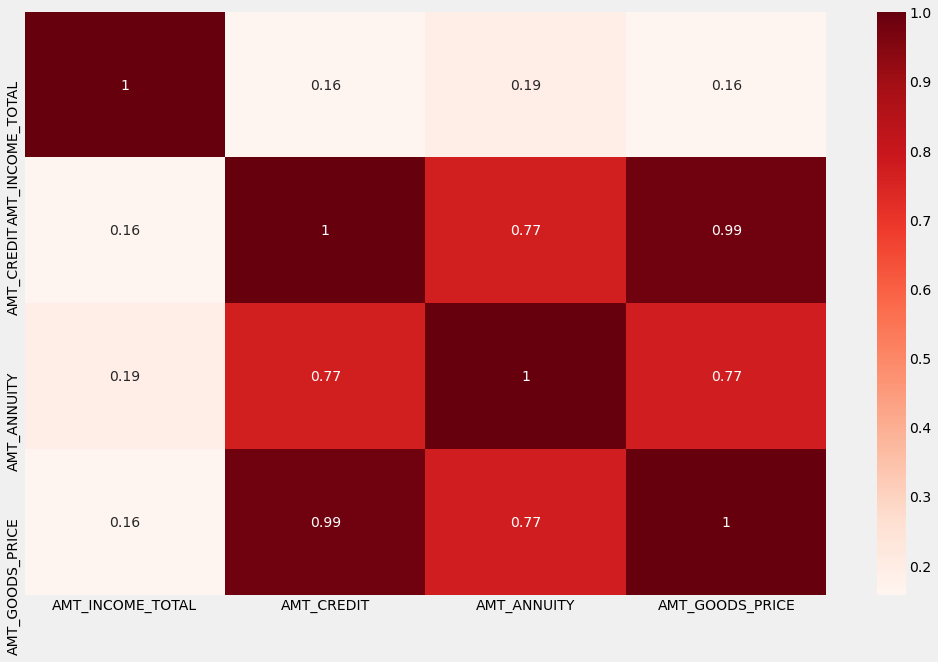

In [177]:
plt.figure(figsize=(16,10))
sns.heatmap(app_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].corr(),annot=True,cmap='Reds')
plt.show()

##  Income Type and Loan Type Analysis with respect to Target
- UnEmployed and Maternity leave Apllicants who took Cash loans are having high percentage of defaulters

In [178]:
res=pd.pivot_table(index='NAME_CONTRACT_TYPE',columns='NAME_INCOME_TYPE',values='TARGET',data=app_data)
res

NAME_INCOME_TYPE,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working
NAME_CONTRACT_TYPE,,,,,,,,
Cash loans,NaN,0.078395,1.0,0.054661,0.059891,0.0,0.533333,0.099433
Revolving loans,0.0,0.046453,0.0,0.041555,0.032673,0.0,0.000000,0.064341


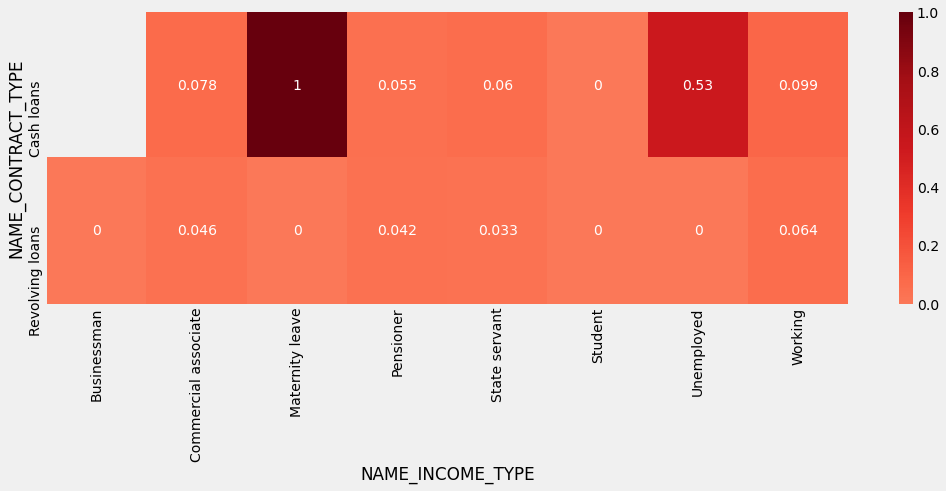

In [211]:
plt.figure(figsize=(16,5))
sns.heatmap(res,annot=True,cmap='Reds',center=0.08)
plt.show()

In [217]:
res=pd.pivot_table(index='NAME_CONTRACT_TYPE',columns='NAME_EDUCATION_TYPE',values='TARGET',data=app_data)
res

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
NAME_CONTRACT_TYPE,,,,,
Cash loans,0.020548,0.056551,0.088795,0.110033,0.091568
Revolving loans,0.000000,0.033012,0.056225,0.096154,0.065641


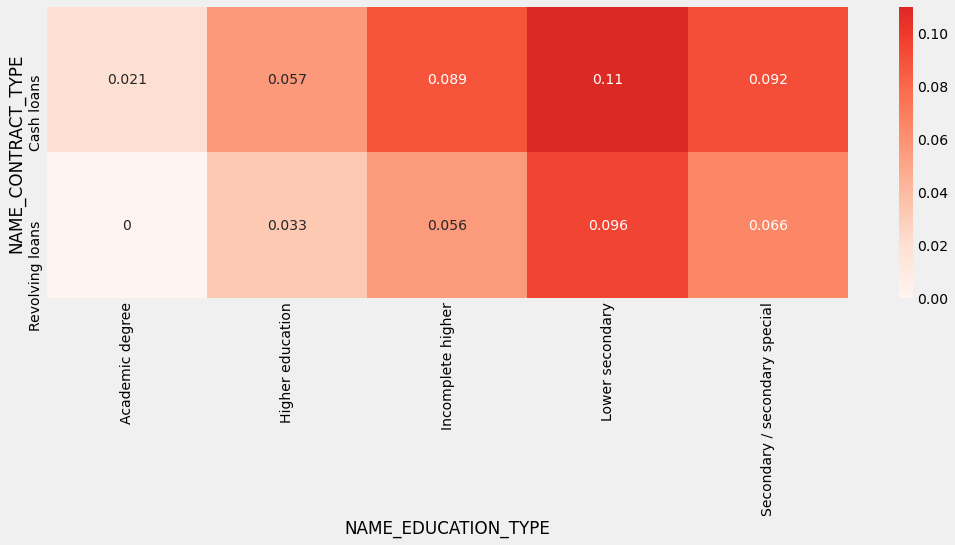

In [218]:
plt.figure(figsize=(16,5))
sns.heatmap(res,annot=True,cmap='Reds',center=0.08)
plt.show()

In [219]:
res=pd.pivot_table(index='NAME_INCOME_TYPE',columns='NAME_EDUCATION_TYPE',values='TARGET',data=app_data)
res

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
NAME_INCOME_TYPE,,,,,
Businessman,NaN,0.000000,NaN,NaN,NaN
Commercial associate,0.023256,0.051738,0.082059,0.121739,0.086544
Maternity leave,NaN,0.000000,NaN,NaN,1.000000
Pensioner,0.000000,0.041524,0.044402,0.066710,0.055808
State servant,0.000000,0.038813,0.067532,0.078431,0.070741
Student,NaN,0.000000,0.000000,NaN,0.000000
Unemployed,NaN,0.000000,0.333333,NaN,0.538462
Working,0.027778,0.061667,0.092569,0.145507,0.105177


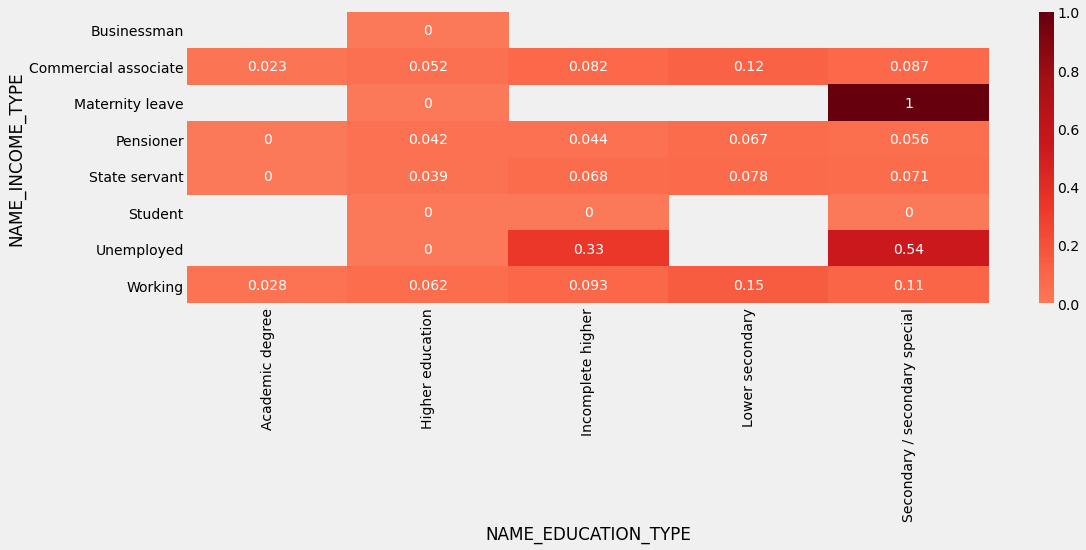

In [220]:
plt.figure(figsize=(16,5))
sns.heatmap(res,annot=True,cmap='Reds',center=0.08)
plt.show()

In [221]:
res=pd.pivot_table(index='NAME_CONTRACT_TYPE',columns='grouped_age',values='TARGET',data=app_data)
res

grouped_age,less than 20,20-30,30-40,40-50,50-60,greater than 60
NAME_CONTRACT_TYPE,,,,,,
Cash loans,0.0,0.119616,0.097183,0.078191,0.061354,0.049881
Revolving loans,NaN,0.079672,0.052768,0.048899,0.036038,0.036965


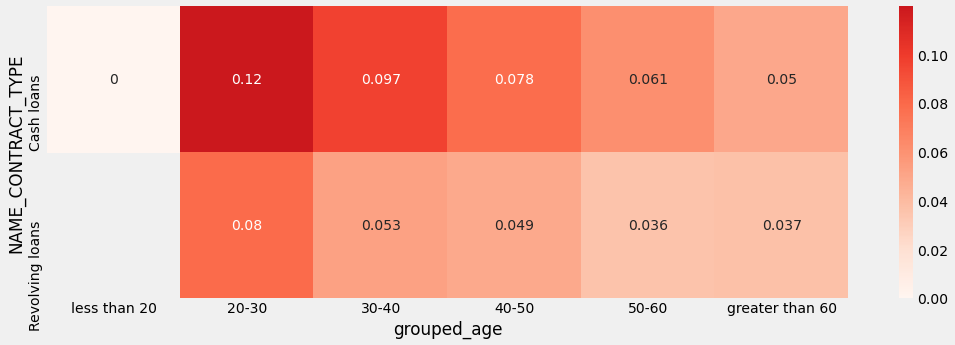

In [222]:
plt.figure(figsize=(16,5))
sns.heatmap(res,annot=True,cmap='Reds',center=0.08)
plt.show()

In [223]:
res=pd.pivot_table(index='NAME_INCOME_TYPE',columns='grouped_income',values='TARGET',data=app_data)
res

grouped_income,0-0.25,0.25-0.50,0.50-0.75,0.75-0.99,0.99-1
NAME_INCOME_TYPE,,,,,
Businessman,NaN,NaN,0.000000,0.000000,0.000000
Commercial associate,0.086195,0.081403,0.078320,0.063649,0.048913
Maternity leave,0.666667,0.000000,NaN,0.000000,NaN
Pensioner,0.053047,0.054719,0.057379,0.051013,0.026455
State servant,0.069682,0.058740,0.060586,0.042121,0.044248
Student,0.000000,0.000000,0.000000,0.000000,0.000000
Unemployed,0.466667,0.333333,NaN,0.000000,NaN
Working,0.100756,0.099679,0.096805,0.083748,0.070438


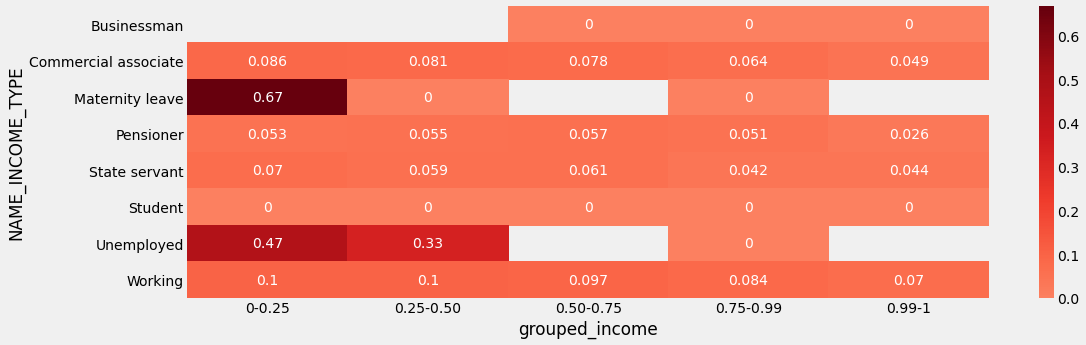

In [224]:
plt.figure(figsize=(16,5))
sns.heatmap(res,annot=True,cmap='Reds',center=0.08)
plt.show()

In [180]:
app_data.shape

(307511, 92)

## We will combine two DataSets

In [181]:
prev_data=pd.read_csv('previous_application.csv')

In [182]:
prev_data.shape

(1670214, 37)

In [183]:
combined=app_data.merge(prev_data,left_on='SK_ID_CURR',right_on='SK_ID_CURR',how='inner')
combined.shape

(1413701, 128)

In [184]:
combined.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DOB,grouped_age,Employed(years),grouped_employed,Registration_Change,grouped_reg_change(years),Identity_change,grouped_identity_change(years),grouped_income,grouped_loan_amount,grouped_annuity,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25,20-30,1,0-5,9.0,5-10,5,0-5,0.50-0.75,0.25-0.50,0.50-0.75,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,40-50,3,0-5,3.0,0-5,0,0-5,0.75-0.99,0.75-0.99,0.75-0.99,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0

In [185]:
combined.groupby('SK_ID_CURR').count()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DOB,grouped_age,Employed(years),grouped_employed,Registration_Change,grouped_reg_change(years),Identity_change,grouped_identity_change(years),grouped_income,grouped_loan_amount,grouped_annuity,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
100003,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3,3,3,2,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
100004,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
100006,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,0,0,0,0,0,0,0,0,0,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,0,0,0,0,0,0,9,9,9,9,9,9,9,9,9,9,9,9,9,6,9,9,2,6,9,9,9,9,2,0,0,9,9,9,9,9,4,9,9,9,9,9,9,9,6,9,9,4,4,4,4,4,4
100007,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,0,0,0,0,0,0,0,0,0,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,2,6,6,6,6,6,2,0,0,6,6,6,6,6,4,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

## Analysis of Combined DataSet
- Droping Columns having higher percentage of null values

In [186]:
combined.isnull().sum()/len(combined.index)*100

SK_ID_CURR                         0.000000
TARGET                             0.000000
NAME_CONTRACT_TYPE_x               0.000000
CODE_GENDER                        0.000000
FLAG_OWN_CAR                       0.000000
FLAG_OWN_REALTY                    0.000000
CNT_CHILDREN                       0.000000
AMT_INCOME_TOTAL                   0.000000
AMT_CREDIT_x                       0.000000
AMT_ANNUITY_x                      0.000000
AMT_GOODS_PRICE_x                  0.000000
NAME_TYPE_SUITE_x                  0.000000
NAME_INCOME_TYPE                   0.000000
NAME_EDUCATION_TYPE                0.000000
NAME_FAMILY_STATUS                 0.000000
NAME_HOUSING_TYPE                  0.000000
REGION_POPULATION_RELATIVE         0.000000
DAYS_BIRTH                         0.000000
DAYS_EMPLOYED                      0.000000
DAYS_REGISTRATION                  0.000000
DAYS_ID_PUBLISH                    0.000000
FLAG_MOBIL                         0.000000
FLAG_EMP_PHONE                  

In [187]:
combined=combined.loc[:, combined.isnull().mean() <= 0.5]
combined

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DOB,grouped_age,Employed(years),grouped_employed,Registration_Change,grouped_reg_change(years),Identity_change,grouped_identity_change(years),grouped_income,grouped_loan_amount,grouped_annuity,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25,20-30,1,0-5,9.0,5-10,5,0-5,0.50-0.75,0.25-0.50,0.50-0.75,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,40-50,3,0-5,3.0,0-5,0,0-5,0.75-0.99,0.75-0.99,0.75-0.99,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No

## We see Count of Approved Applicants amongst the previous Applicants are high

<Figure size 432x288 with 0 Axes>

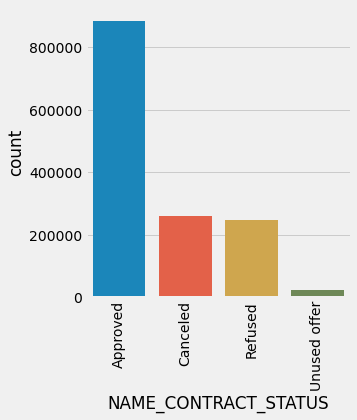

In [188]:
plt.figure()
plt.style.use('fivethirtyeight')
ax=sns.catplot(x='NAME_CONTRACT_STATUS',kind='count',data=combined)
ax.set_xticklabels(rotation=90)
plt.show()

## Percentage of Defaulters is highest for Refused Applicants, followed by Cancelled

Text(0, 0.5, 'Proportion of Defaulters to overall')

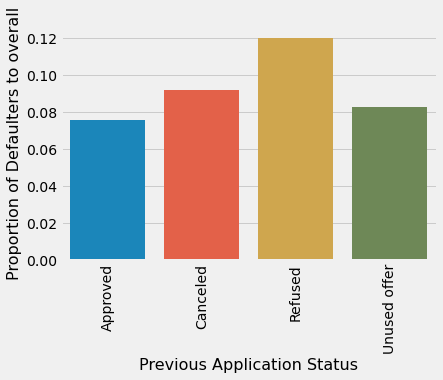

In [191]:
# Percentage of Defaulters is highest for Refused Applicants
df=combined[['NAME_CONTRACT_STATUS','TARGET']].groupby(['NAME_CONTRACT_STATUS']).mean()
df.reset_index(inplace=True)
plt.figure()
sns.set_color_codes('pastel')
ax=sns.barplot(x='NAME_CONTRACT_STATUS',y='TARGET',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel('Previous Application Status', fontsize = 16)
plt.ylabel('Proportion of Defaulters to overall', fontsize = 16)

In [192]:

combined["STATUS_APPROVED"]=[1 if x=='Approved'else 0 for x in combined['NAME_CONTRACT_STATUS']]
combined["STATUS_REFUSED"]=[1 if x=='Refused'else 0 for x in combined['NAME_CONTRACT_STATUS']]
combined["STATUS_CANCELED"]=[1 if x=='Canceled' else 0 for x in combined['NAME_CONTRACT_STATUS']]
combined["STATUS_UNUSED_OFFER"]=[1 if x=='Unused offer' else 0 for x in combined['NAME_CONTRACT_STATUS']]

In [193]:
def combined_analysis(var,xlabel,rotation):
    plt.figure(figsize=(16,16))
    plt.subplot(2,2,1)

    df=combined[[var,'STATUS_APPROVED']].groupby([var]).mean()
    df.reset_index(inplace=True)
    sns.set_color_codes('pastel')
    ax=sns.barplot(x=var,y='STATUS_APPROVED',data=df)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=rotation)
    plt.xlabel(xlabel, fontsize = 16)
    plt.ylabel('Proportion of People with Status Approved', fontsize = 16)

    plt.subplot(2,2,2)
    df=combined[[var,'STATUS_REFUSED']].groupby([var]).mean()
    df.reset_index(inplace=True)
    sns.set_color_codes('pastel')
    ax=sns.barplot(x=var,y='STATUS_REFUSED',data=df)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=rotation)
    plt.xlabel(xlabel, fontsize = 16)
    plt.ylabel('Proportion of People with Status Refused', fontsize = 16)

    plt.subplot(2,2,3)
    df=combined[[var,'STATUS_CANCELED']].groupby([var]).mean()
    df.reset_index(inplace=True)
    sns.set_color_codes('pastel')
    ax=sns.barplot(x=var,y='STATUS_CANCELED',data=df)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=rotation)
    plt.xlabel(xlabel, fontsize = 16)
    plt.ylabel('Proportion of People with Status Cancelled', fontsize = 16)

    plt.subplot(2,2,4)
    df=combined[[var,'STATUS_UNUSED_OFFER']].groupby([var]).mean()
    df.reset_index(inplace=True)
    sns.set_color_codes('pastel')
    ax=sns.barplot(x=var,y='STATUS_UNUSED_OFFER',data=df)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=rotation)
    plt.xlabel(xlabel, fontsize = 16)
    plt.ylabel('Proportion of People with Status Unused offer', fontsize = 16)

    plt.show()


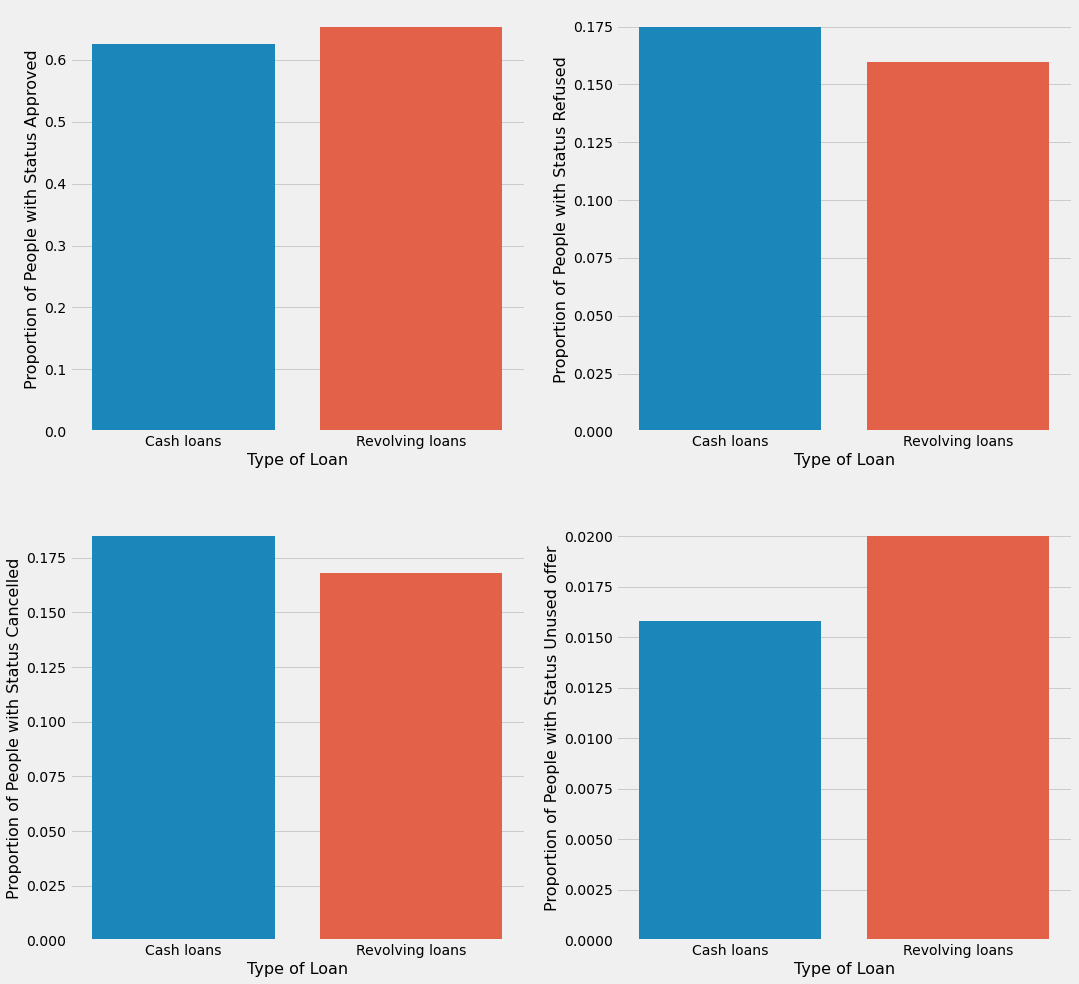

In [194]:
combined_analysis('NAME_CONTRACT_TYPE_x','Type of Loan',0)

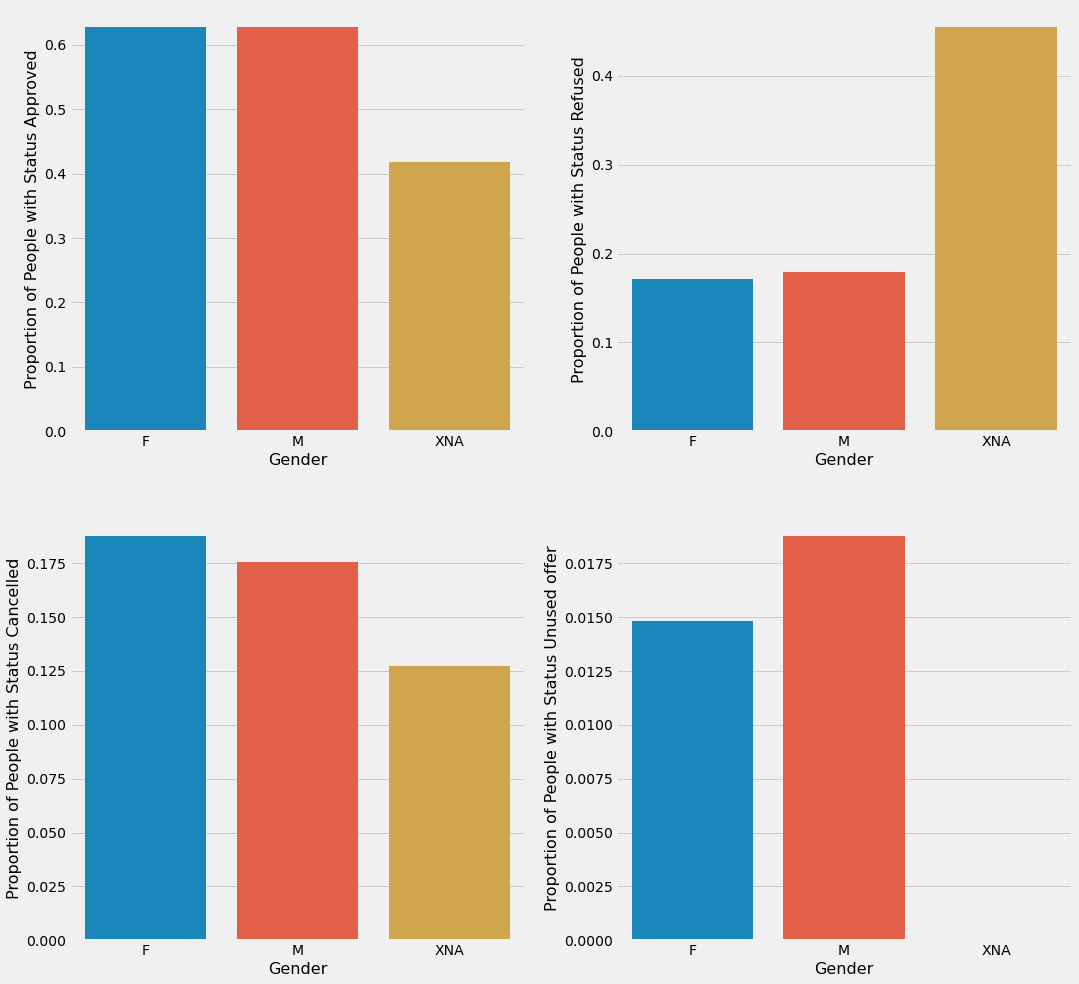

In [195]:
combined_analysis('CODE_GENDER','Gender',0)

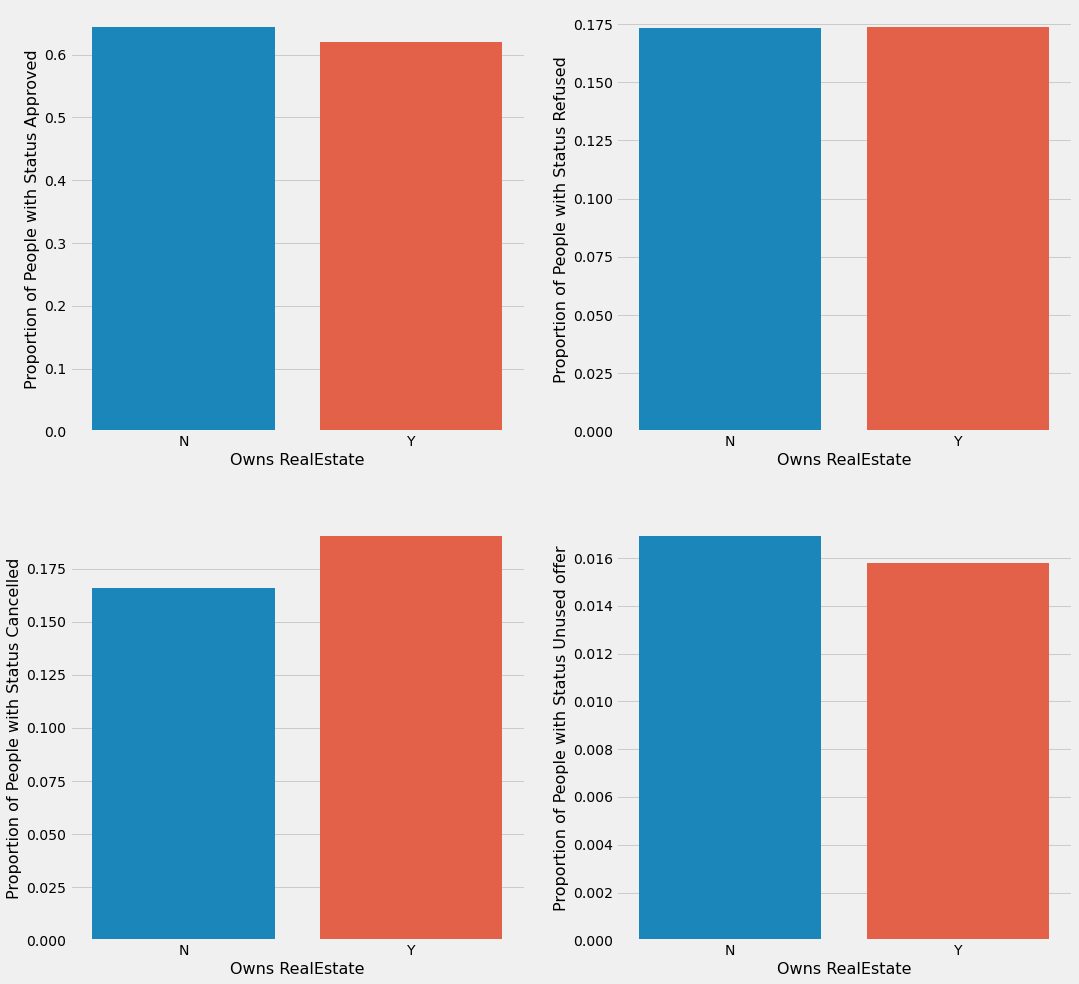

In [196]:
combined_analysis('FLAG_OWN_REALTY','Owns RealEstate',0)

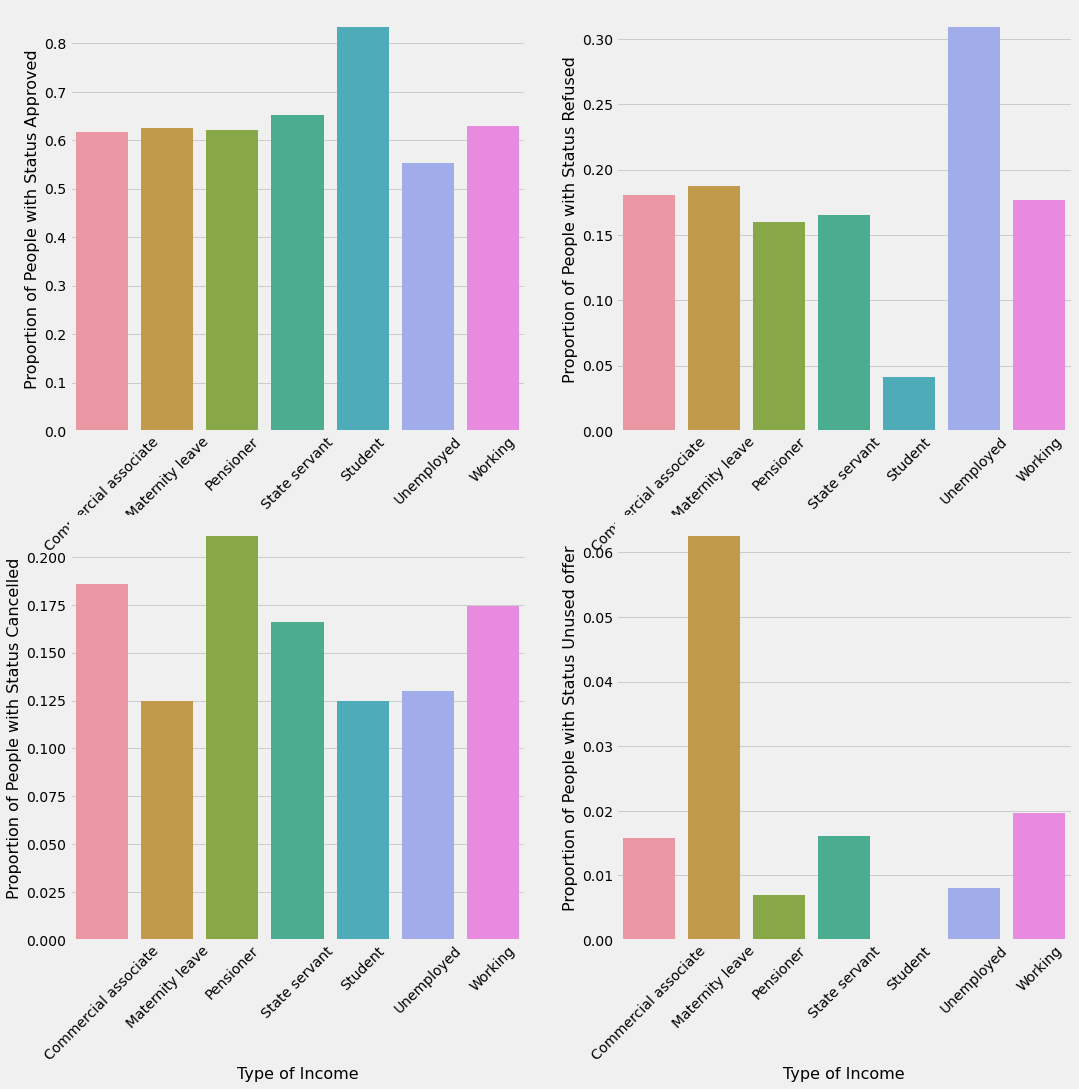

In [197]:
combined_analysis('NAME_INCOME_TYPE','Type of Income',45)

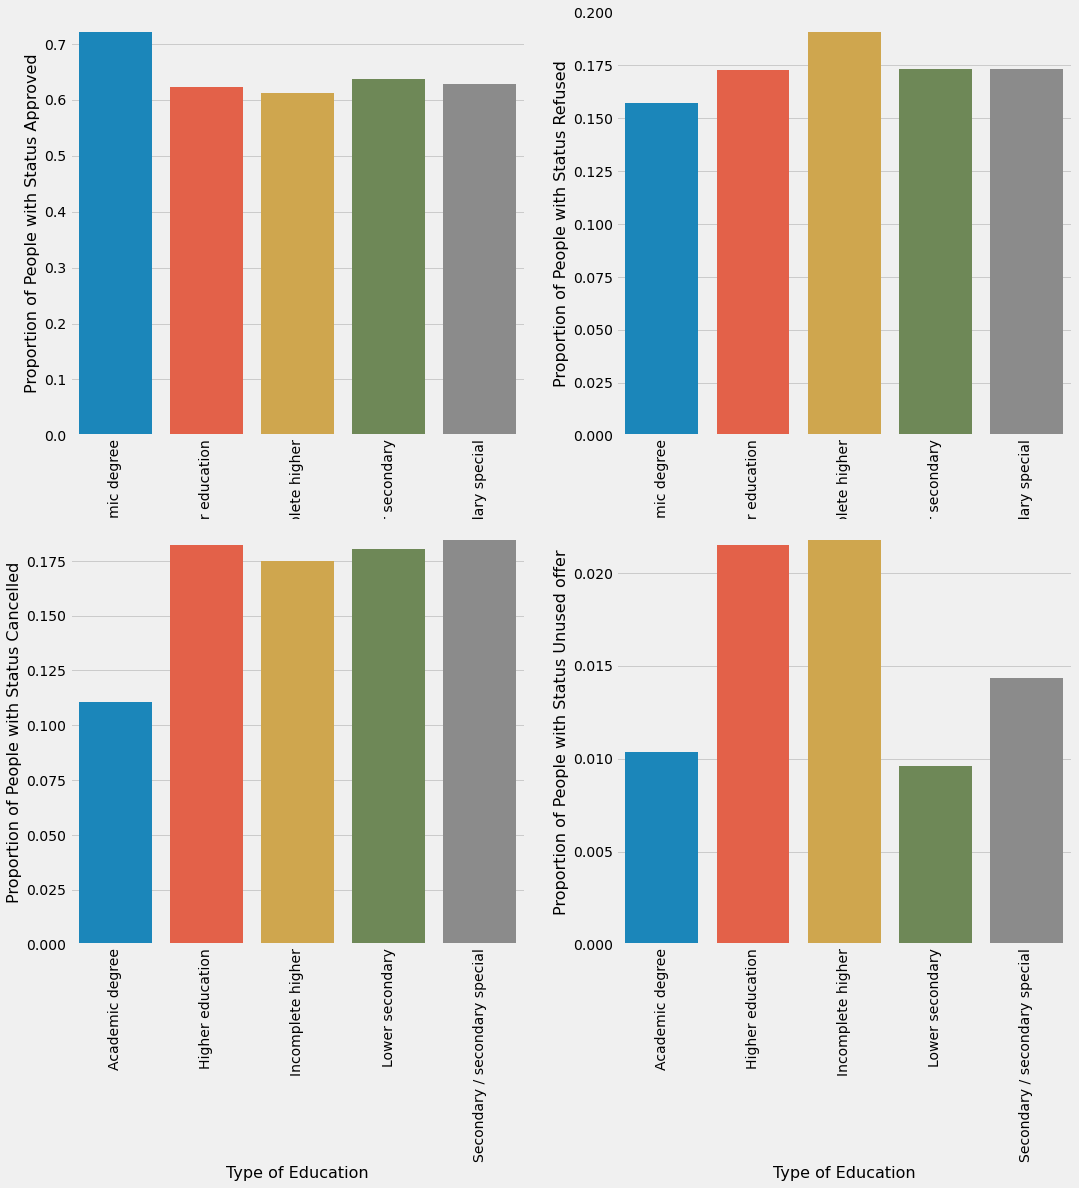

In [198]:
combined_analysis('NAME_EDUCATION_TYPE','Type of Education',90)

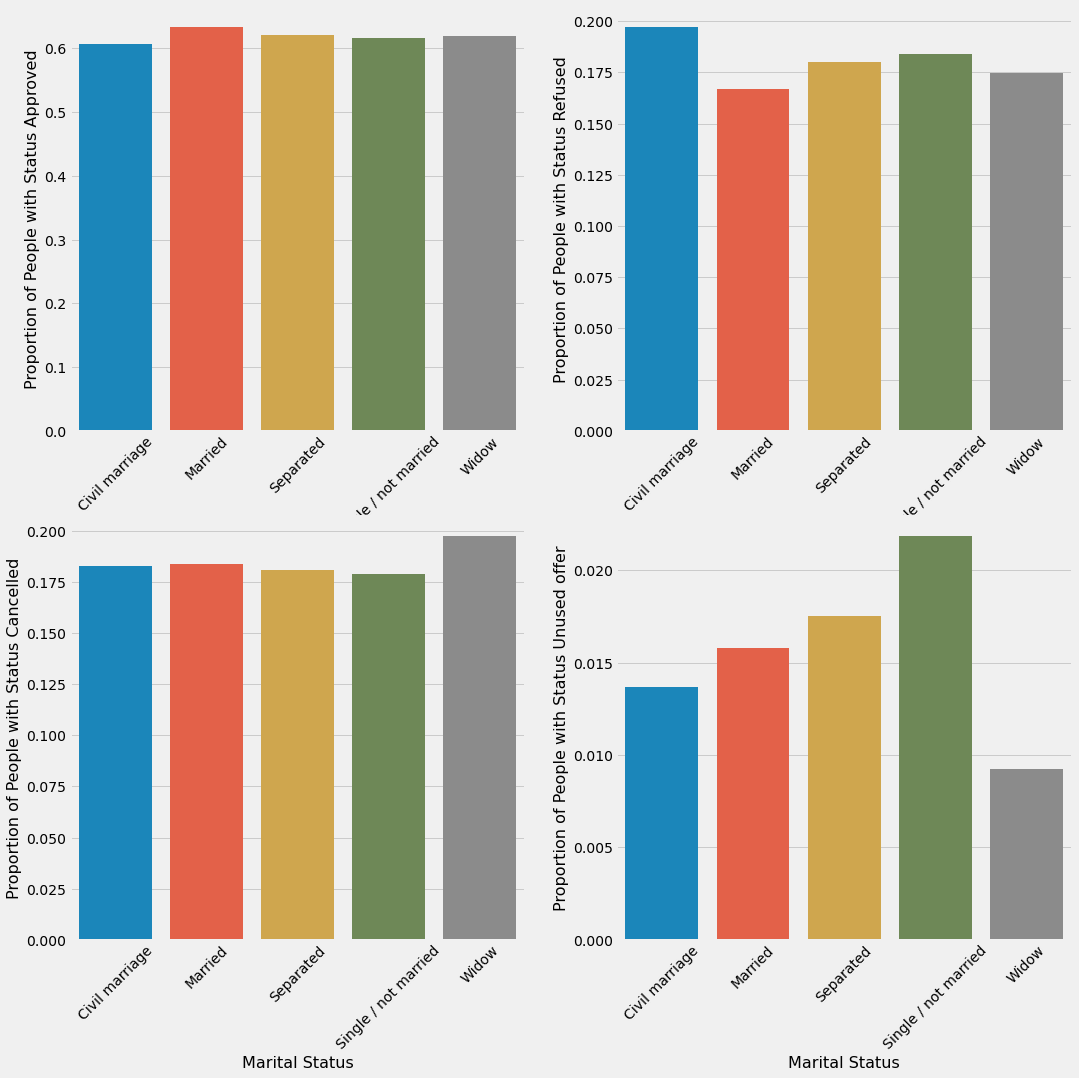

In [199]:
combined_analysis('NAME_FAMILY_STATUS','Marital Status',45)

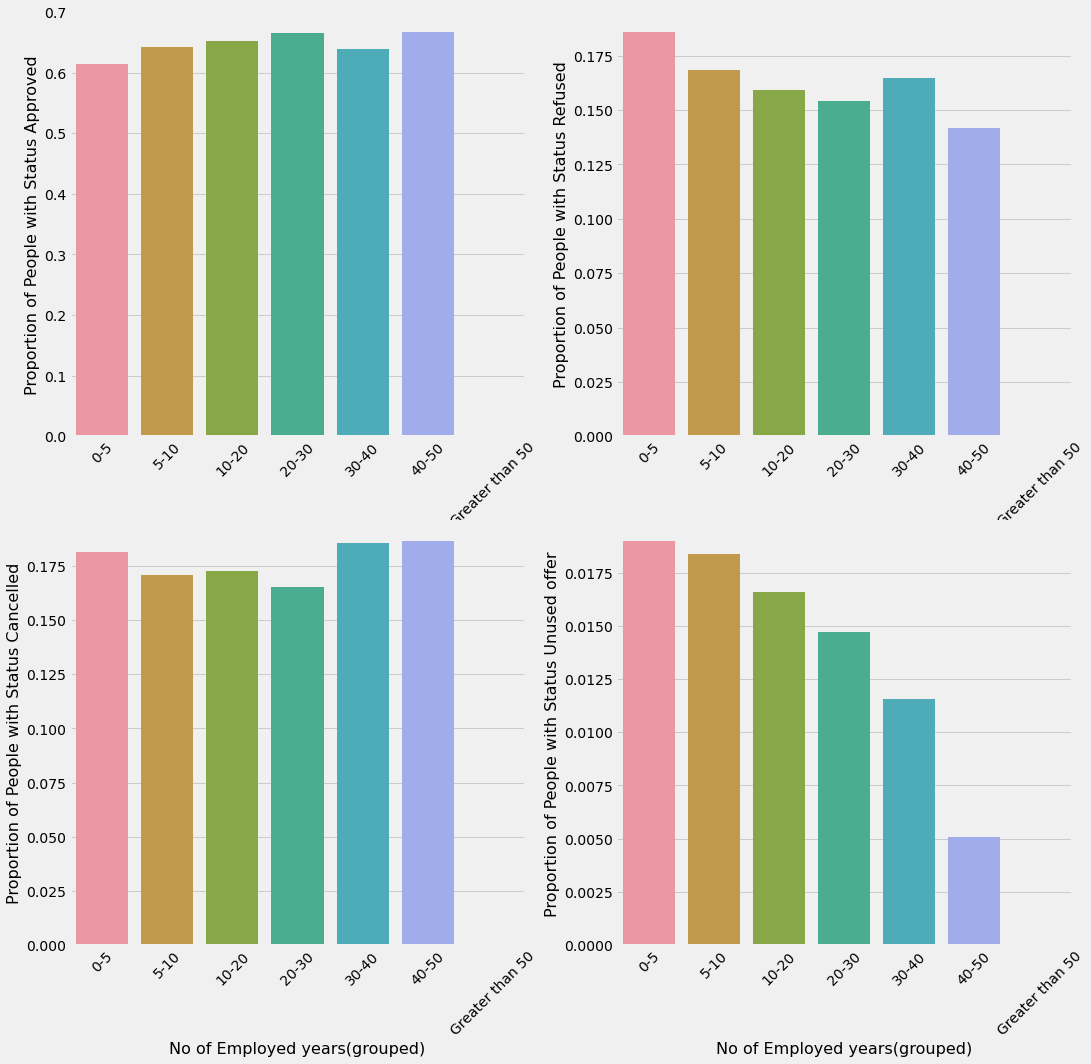

In [200]:
combined_analysis('grouped_employed','No of Employed years(grouped)',45)

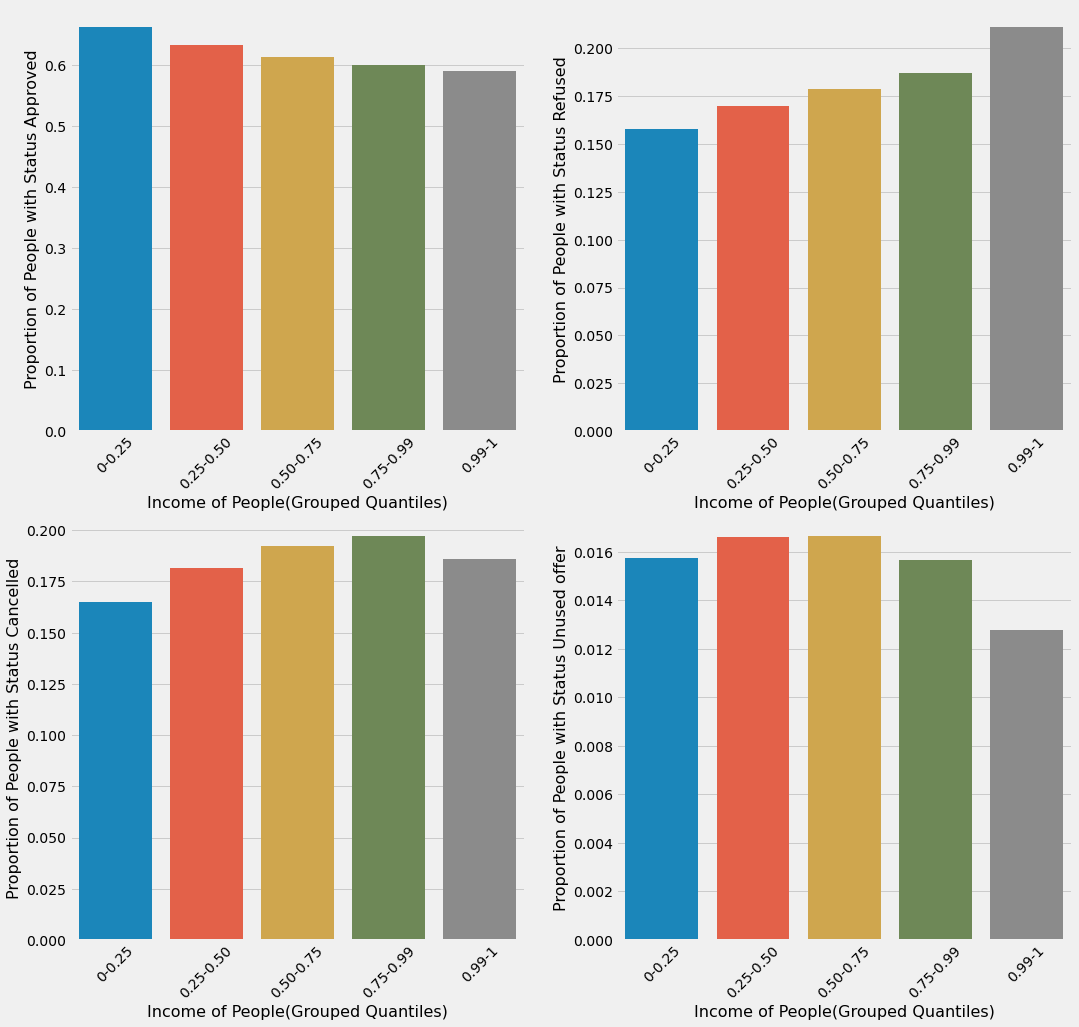

In [201]:
combined_analysis('grouped_income','Income of People(Grouped Quantiles)',45)

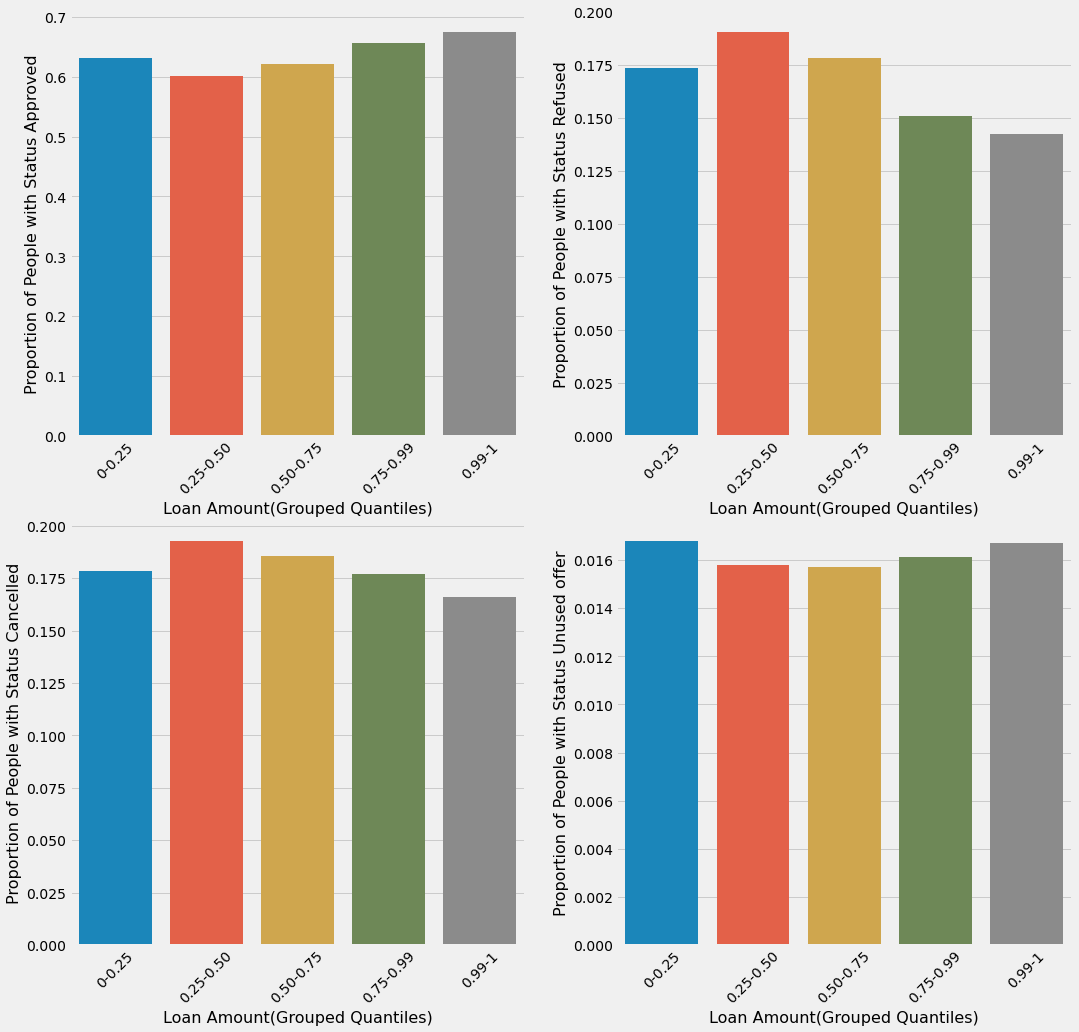

In [202]:
combined_analysis('grouped_loan_amount','Loan Amount(Grouped Quantiles)',45)

In [209]:
flag_col=['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']
combined['flag_docs']=combined[flag_col].max(axis=1)

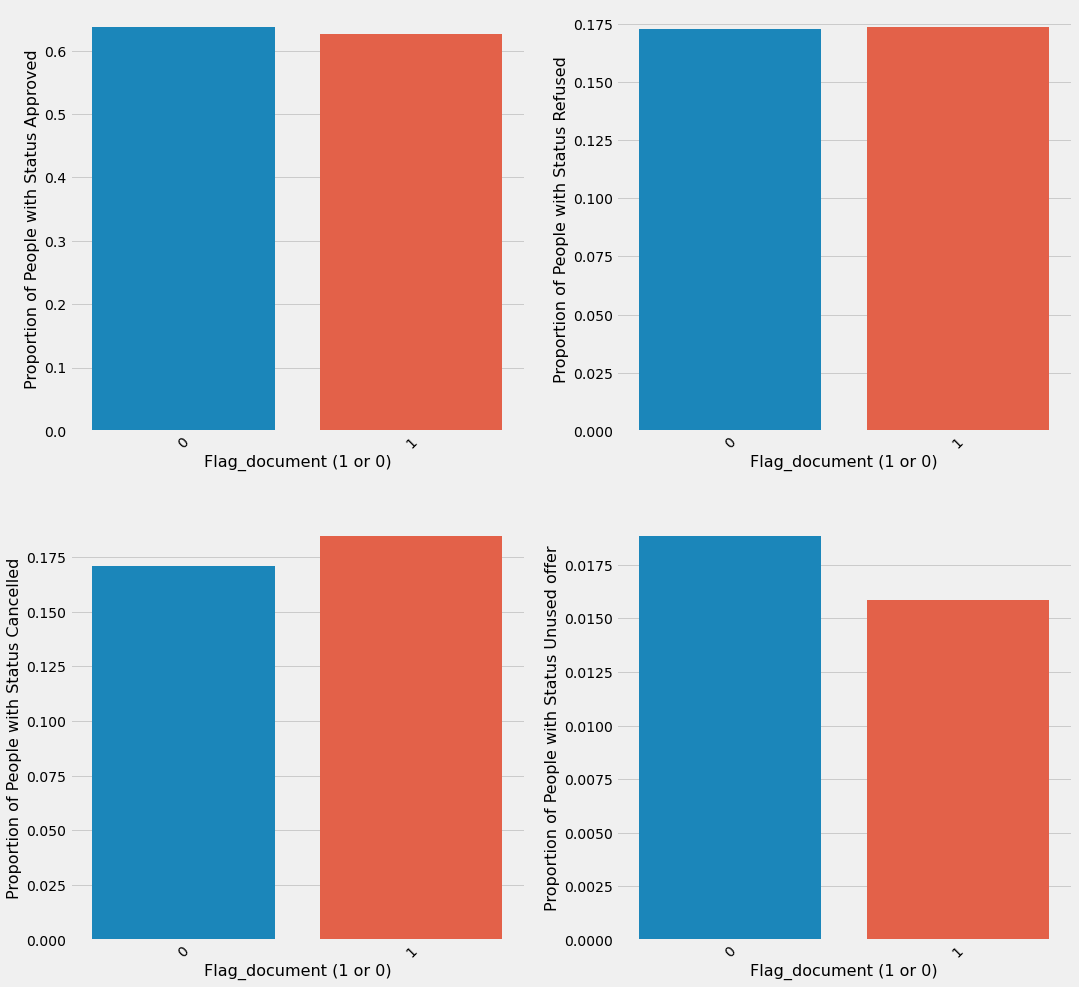

In [210]:
combined_analysis('flag_docs','Flag_document (1 or 0)',45)